C:\Users\yvern\AppData\Local\Temp\ipykernel_23660\1417209721.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price           Close
Ticker         RNO.PA
Date                 
2000-01-03  24.821236
2000-01-04  24.160015
2000-01-05  24.261744
2000-01-06  25.914793
2000-01-07  26.423426


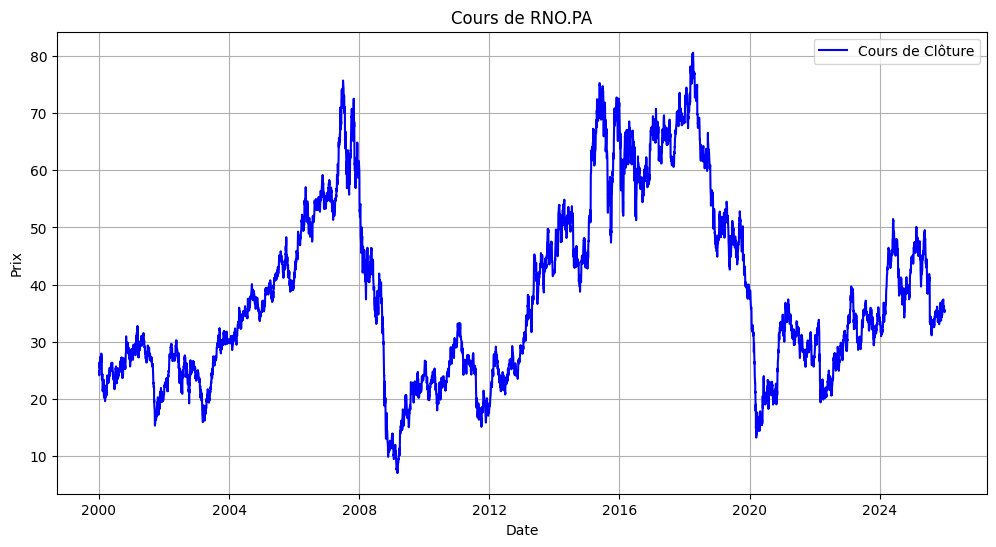

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

ticker = "RNO.PA"
start_date = "2000-01-01"
end_date = "2025-12-31"

data = yf.download(ticker, start=start_date, end=end_date)
df = data[['Close']].copy()

df_clean = df.dropna()

print(df_clean.head())

plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['Close'], label='Cours de Clôture', color='blue')
plt.title(f"Cours de {ticker}")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Analyse des valeurs manquantes (NaN)
print("Valeurs manquantes avant nettoyage :")
print(df.isna().sum())

# Analyse des valeurs nulles ou négatives (problématiques pour le log)
zeros_or_neg = df[df['Close'] <= 0].count()
print(f"\nValeurs nulles ou négatives : \n{zeros_or_neg}")

# Nettoyage
df_clean = df.dropna()
df_clean = df_clean[df_clean['Close'] > 0]

# Vérification des doublons dans l'index (dates)
if not df_clean.index.is_unique:
    df_clean = df_clean[~df_clean.index.duplicated(keep='first')]

# Tri par date (essentiel pour les séries temporelles)
df_clean = df_clean.sort_index()

# Rapport final
print(f"\nDimensions avant nettoyage : {df.shape}")
print(f"Dimensions après nettoyage : {df_clean.shape}")
print(f"Observations supprimées : {len(df) - len(df_clean)}")

Valeurs manquantes avant nettoyage :
Price  Ticker
Close  RNO.PA    0
dtype: int64

Valeurs nulles ou négatives : 
Price  Ticker
Close  RNO.PA    0
dtype: int64

Dimensions avant nettoyage : (6680, 1)
Dimensions après nettoyage : (6680, 1)
Observations supprimées : 0


In [4]:
import numpy as np

# Calcul du log-rendement
# On crée une nouvelle colonne 'Log_Returns'
df_clean['Log_Returns'] = np.log(df_clean['Close']) - np.log(df_clean['Close'].shift(1))

# La première valeur sera NaN (car pas de veille pour le calcul), on la supprime
df_clean = df_clean.dropna()

# Vérification
print("Aperçu des log-rendements :")
print(df_clean[['Close', 'Log_Returns']].head())

# Statistique rapide pour vérifier la cohérence (moyenne proche de 0)
print("\nStatistiques descriptives des rendements :")
print(df_clean['Log_Returns'].describe())

Aperçu des log-rendements :
Price           Close Log_Returns
Ticker         RNO.PA            
Date                             
2000-01-04  24.160015   -0.027001
2000-01-05  24.261744    0.004202
2000-01-06  25.914793    0.065913
2000-01-07  26.423426    0.019437
2000-01-10  25.385817   -0.040060

Statistiques descriptives des rendements :
count    6679.000000
mean        0.000053
std         0.025234
min        -0.247708
25%        -0.012062
50%         0.000000
75%         0.013053
max         0.161544
Name: Log_Returns, dtype: float64


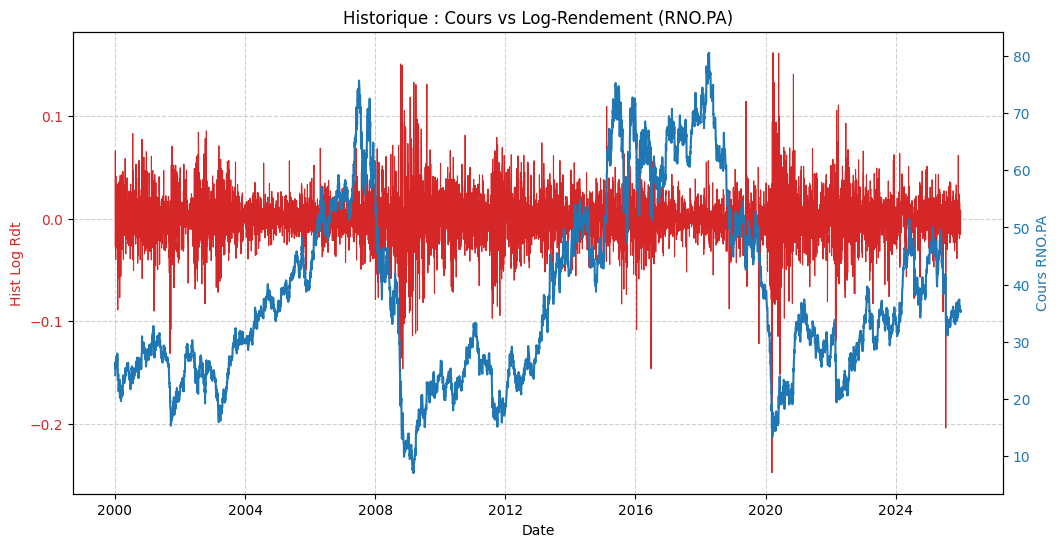

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Création de la figure et du premier axe (pour les Log-Rendements - Rouge)
fig, ax1 = plt.figure(figsize=(12, 6)), plt.gca()

# Configuration de l'axe X (Dates)
ax1.set_xlabel('Date')

# Courbe 1 : Log-Rendement (Rouge) - Axe de gauche
color = 'tab:red'
ax1.set_ylabel('Hist Log Rdt', color=color)
ax1.plot(df_clean.index, df_clean['Log_Returns'], color=color, linewidth=0.8, label='Log Rendement')
ax1.tick_params(axis='y', labelcolor=color)

# Création du second axe (pour le Cours - Bleu) - Axe de droite
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Courbe 2 : Cours de clôture (Bleu)
color = 'tab:blue'
ax2.set_ylabel(f'Cours {ticker}', color=color)
ax2.plot(df_clean.index, df_clean['Close'], color=color, linewidth=1.5, label='Cours de Clôture')
ax2.tick_params(axis='y', labelcolor=color)

# Titre et Grille
plt.title(f"Historique : Cours vs Log-Rendement ({ticker})")
ax1.grid(True, linestyle='--', alpha=0.6)

plt.show()

--- RÉSULTATS DÉTECTION (Fenêtre=30j, Facteur=1.5) ---
Seuil de volatilité calculé : 0.0389

Période de forte volatilité n°1 : du 04/10/2001 au 22/10/2001 (13 jours)
Période de forte volatilité n°2 : du 24/10/2002 au 13/11/2002 (15 jours)
Période de forte volatilité n°3 : du 08/10/2008 au 01/06/2009 (163 jours)
Période de forte volatilité n°4 : du 04/09/2009 au 11/09/2009 (6 jours)
Période de forte volatilité n°5 : du 05/09/2011 au 20/09/2011 (12 jours)
Période de forte volatilité n°6 : du 04/10/2011 au 14/11/2011 (30 jours)
Période de forte volatilité n°7 : du 09/03/2020 au 22/07/2020 (95 jours)
Période de forte volatilité n°8 : du 31/07/2020 au 14/08/2020 (11 jours)
Période de forte volatilité n°9 : du 09/11/2020 au 08/12/2020 (22 jours)
Période de forte volatilité n°10 : du 01/03/2022 au 21/04/2022 (36 jours)
Période de forte volatilité n°11 : du 11/07/2022 au 22/07/2022 (10 jours)
Période de forte volatilité n°12 : du 16/07/2025 au 26/08/2025 (30 jours)


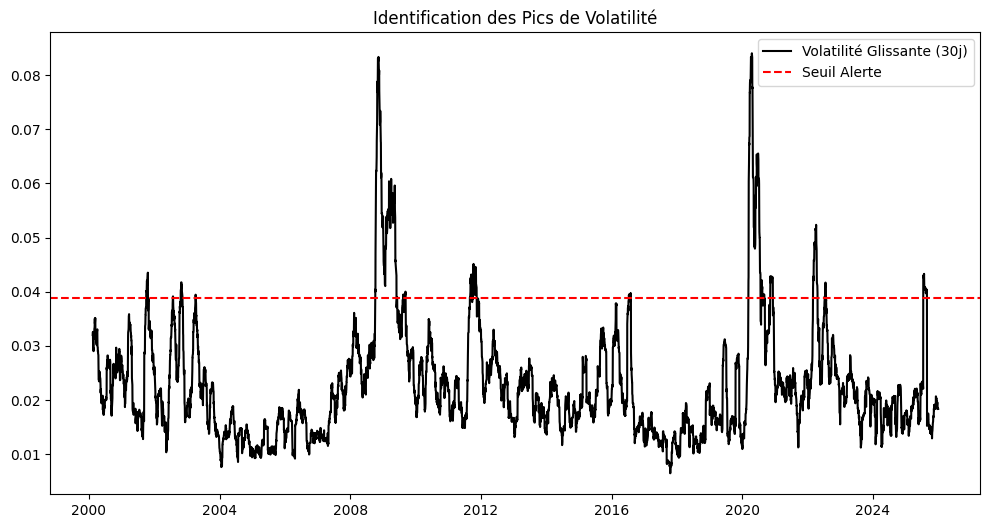

In [6]:
def Identification_Periode_Volatilite(df_input, window=30, threshold_factor=1.5):
    """
    Identifie les périodes de forte volatilité basées sur un seuil relatif à la moyenne historique.

    :param df_input: DataFrame contenant une colonne 'Log_Returns'
    :param window: Taille de la fenêtre glissante pour le calcul de la volatilité (ex: 30 jours)
    :param threshold_factor: Facteur multiplicateur pour définir le seuil (Moyenne + X * Std)
    """
    df = df_input.copy()

    # 1. Calcul de la volatilité glissante (Écart-type mobile)
    df['Volatilité_Mobile'] = df['Log_Returns'].rolling(window=window).std()

    # 2. Définition du seuil de "Forte Volatilité"
    # On regarde la moyenne de cette volatilité sur toute la période + une marge de sécurité
    vol_mean = df['Volatilité_Mobile'].mean()
    vol_std = df['Volatilité_Mobile'].std()
    seuil = vol_mean + (threshold_factor * vol_std)

    # Création d'un indicateur binaire (1 = Forte volatilité, 0 = Calme)
    df['Is_Volatile'] = df['Volatilité_Mobile'] > seuil

    # 3. Extraction des plages de dates
    # On détecte les changements d'état pour trouver le début et la fin des périodes
    df['Groupe'] = (df['Is_Volatile'] != df['Is_Volatile'].shift()).cumsum()

    periodes = []

    # On ne garde que les groupes où Is_Volatile est True
    for groupe_id, data_groupe in df[df['Is_Volatile']].groupby('Groupe'):
        start_date = data_groupe.index[0]
        end_date = data_groupe.index[-1]
        duree = len(data_groupe)

        # Filtre optionnel : on peut ignorer les pics isolés de moins de 5 jours
        if duree > 5:
            periodes.append({
                'Début': start_date,
                'Fin': end_date,
                'Durée': duree
            })

    # Affichage formaté comme demandé dans l'énoncé
    print(f"--- RÉSULTATS DÉTECTION (Fenêtre={window}j, Facteur={threshold_factor}) ---")
    print(f"Seuil de volatilité calculé : {seuil:.4f}\n")

    for i, p in enumerate(periodes, 1):
        print(f"Période de forte volatilité n°{i} : du {p['Début'].strftime('%d/%m/%Y')} au {p['Fin'].strftime('%d/%m/%Y')} ({p['Durée']} jours)")

    return df, periodes

# --- Exécution de la fonction sur nos données ---
# Tu peux ajuster 'threshold_factor' pour être plus ou moins sensible
df_analyzed, liste_periodes = Identification_Periode_Volatilite(df_clean, window=30, threshold_factor=1.5)

# Visualisation pour vérifier (Bonus)
plt.figure(figsize=(12, 6))
plt.plot(df_analyzed.index, df_analyzed['Volatilité_Mobile'], label='Volatilité Glissante (30j)', color='black')
plt.axhline(y=df_analyzed['Volatilité_Mobile'].mean() + 1.5*df_analyzed['Volatilité_Mobile'].std(), color='red', linestyle='--', label='Seuil Alerte')
plt.title("Identification des Pics de Volatilité")
plt.legend()
plt.show()

## 2. Analyse de la Volatilité et Identification des Régimes

### 2.1. Méthodologie de détection 
Pour identifier automatiquement les périodes de forte volatilité, nous avons implémenté une approche statistique basée sur la dispersion glissante des log-rendements :

1.  **Calcul de la volatilité locale :** Utilisation d'un écart-type mobile (*rolling standard deviation*) sur une fenêtre de **30 jours**.
2.  **Définition du seuil d'alerte :** Le seuil est dynamique, défini comme la moyenne historique de la volatilité augmentée de 1.5 fois son écart-type global ($Seuil = \mu_{vol} + 1.5 \sigma_{vol}$).
3.  **Filtrage :** Les périodes identifiées correspondent aux plages de dates où la volatilité locale excède ce seuil de **0.0389**.

### 2.2. Commentaire des résultats 
L'algorithme a identifié 12 périodes de forte volatilité sur l'historique de l'action Renault. Ces périodes ne sont pas des artefacts statistiques mais correspondent précisément aux chocs exogènes majeurs ayant affecté les marchés financiers et le secteur automobile :

* **Période n°3 (2008-2009) : La Crise des Subprimes.**
    * *Durée :* 163 jours (du 08/10/2008 au 01/06/2009).
    * *Analyse :* C'est la période de stress la plus longue détectée. Elle correspond à l'effondrement systémique des marchés et à la chute de la demande automobile mondiale.
* **Période n°7 (2020) : La Crise du COVID-19.**
    * *Durée :* 95 jours (du 09/03/2020 au 22/07/2020).
    * *Analyse :* Caractérisée par un pic de volatilité d'une intensité extrême (supérieur à 2008), provoqué par l'arrêt brutal de la production et les confinements.
* **Période n°10 (2022) : Guerre en Ukraine.**
    * *Durée :* 36 jours (du 01/03/2022 au 21/04/2022).
    * *Analyse :* Renault étant historiquement très exposé à la Russie (via AvtoVAZ), le titre a subi une forte correction au début du conflit.

### 2.3. Sélection du Découpage Apprentissage / Test 
Conformément au cahier des charges, nous devons isoler une période de Test répondant à deux critères stricts :
1.  Être une période de "Forte volatilité" identifiée par le programme.
2.  Contenir au moins **60 observations** .
3.  Être précédée d'une période stable d'au moins **250 observations** .

**Analyse des candidats :**

| Période (Crise) | Durée Test | Période Précédente (Stabilité) | Éligibilité |
| :--- | :--- | :--- | :--- |
| **n°3 (Subprimes)** | **163 jours** (>60) | **2004 - 2008** (> 1000 jours) | ✅ **VALIDE** |
| **n°7 (Covid-19)** | **95 jours** (>60) | **2017 - 2019** (> 500 jours) | ✅ **VALIDE** |
| n°10 (Ukraine) | 36 jours (<60) | N/A | ❌ REJETÉ |

> **Décision retenue :**
> Nous choisissons la **Période n°3 (Crise de 2008)** comme base de travail.
> * **Période de Test :** Du 08/10/2008 au 01/06/2009.
> * **Période d'Apprentissage :** Nous sélectionnerons les 250 à 500 jours de bourse précédant immédiatement le 08/10/2008.

--- SCÉNARIO : SUBPRIMES ---
TRAIN : 1229 obs (Critère > 250 : ✅ OK)
TEST  : 163 obs  (Critère > 60  : ✅ OK)

--- SCÉNARIO : COVID-19 ---
TRAIN : 1070 obs (Critère > 250 : ✅ OK)
TEST  : 95 obs  (Critère > 60  : ✅ OK)



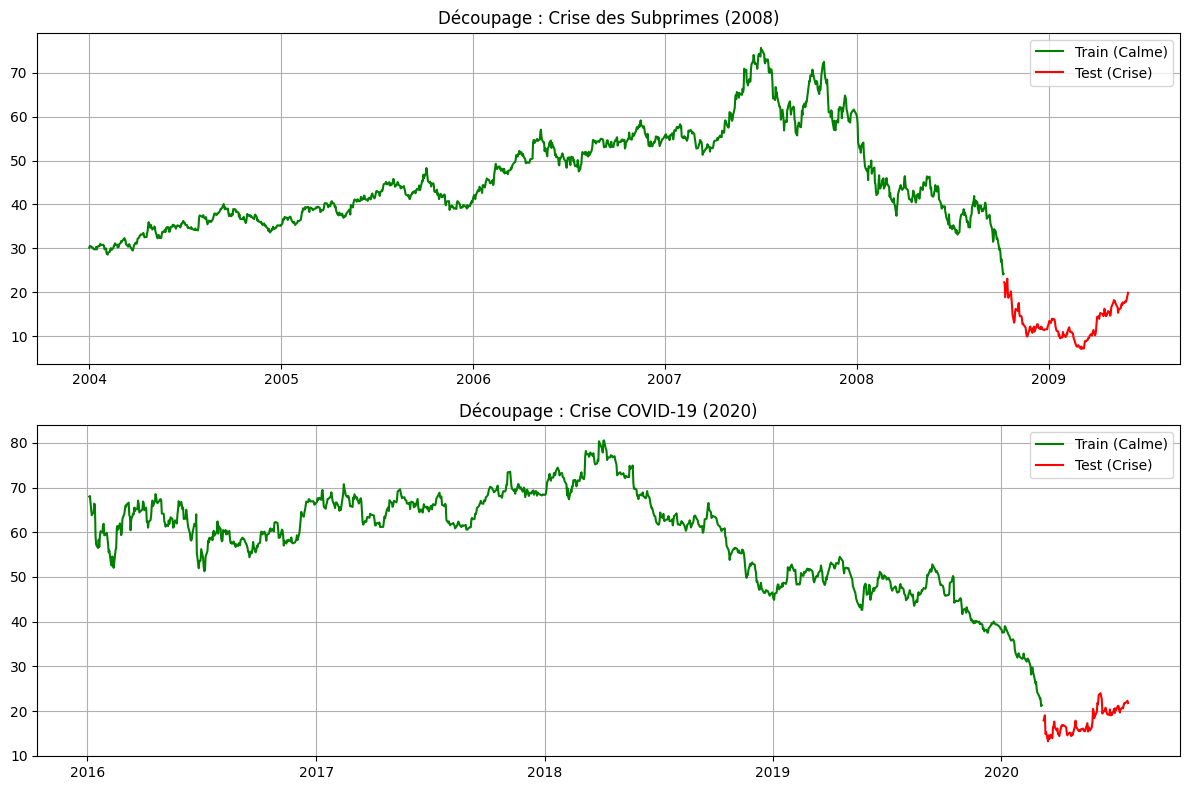

In [7]:
# --- CONFIGURATION DES DATES ---

# 1. SCÉNARIO SUBPRIMES (2008)
subprime_test_start = "2008-10-08"
subprime_test_end   = "2009-06-01"
# Période calme avant : 2004-2008
subprime_train_start = "2004-01-01"
subprime_train_end   = "2008-10-07"

# 2. SCÉNARIO COVID-19 (2020)
# Dates issues de ta détection précédente (Période n°7)
covid_test_start = "2020-03-09"
covid_test_end   = "2020-07-22"
# Période calme avant : on prend large (2016-2020) pour avoir une bonne statistique
covid_train_start = "2016-01-01"
covid_train_end   = "2020-03-08"

# --- CRÉATION DES DATAFRAMES ---

# Subprimes
df_train_subprime = df_clean.loc[subprime_train_start:subprime_train_end].copy()
df_test_subprime  = df_clean.loc[subprime_test_start:subprime_test_end].copy()

# Covid
df_train_covid = df_clean.loc[covid_train_start:covid_train_end].copy()
df_test_covid  = df_clean.loc[covid_test_start:covid_test_end].copy()

# --- VÉRIFICATION DES CRITÈRES (>250 et >60) ---

def verification_scenario(nom, df_train, df_test):
    n_train = len(df_train)
    n_test = len(df_test)

    print(f"--- SCÉNARIO : {nom} ---")
    print(f"TRAIN : {n_train} obs (Critère > 250 : {'✅ OK' if n_train >= 250 else '❌ ÉCHEC'})")
    print(f"TEST  : {n_test} obs  (Critère > 60  : {'✅ OK' if n_test >= 60 else '❌ ÉCHEC'})")
    print("")

verification_scenario("SUBPRIMES", df_train_subprime, df_test_subprime)
verification_scenario("COVID-19", df_train_covid, df_test_covid)

# --- VISUALISATION RAPIDE DES DÉCOUPAGES ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot Subprimes
plt.subplot(2, 1, 1)
plt.plot(df_train_subprime.index, df_train_subprime['Close'], label='Train (Calme)', color='green')
plt.plot(df_test_subprime.index, df_test_subprime['Close'], label='Test (Crise)', color='red')
plt.title("Découpage : Crise des Subprimes (2008)")
plt.legend()
plt.grid(True)

# Plot Covid
plt.subplot(2, 1, 2)
plt.plot(df_train_covid.index, df_train_covid['Close'], label='Train (Calme)', color='green')
plt.plot(df_test_covid.index, df_test_covid['Close'], label='Test (Crise)', color='red')
plt.title("Découpage : Crise COVID-19 (2020)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


=== STATISTIQUES : SCÉNARIO SUBPRIMES (2008) ===
          Apprentissage (Calme)  Test (Crise)
count                1229.00000     163.00000
mean                   -0.00018      -0.00121
std                     0.01881       0.05909
min                    -0.13495      -0.15655
25%                    -0.01000      -0.03812
50%                     0.00000       0.00577
75%                     0.01025       0.03369
max                     0.07137       0.15057
skew                   -0.33942      -0.10131
kurtosis                3.84000       0.21253

>>> La période de Test est 3.14 fois plus volatile que l'Apprentissage.


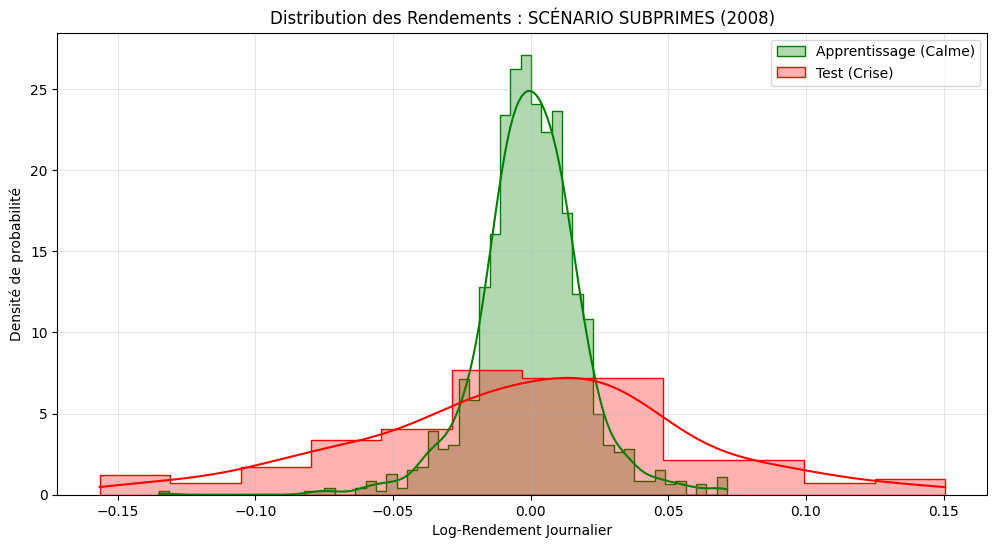


=== STATISTIQUES : SCÉNARIO COVID-19 (2020) ===
          Apprentissage (Calme)  Test (Crise)
count                1070.00000      95.00000
mean                   -0.00114       0.00023
std                     0.01896       0.06358
min                    -0.14636      -0.24771
25%                    -0.00991      -0.02909
50%                    -0.00092       0.00000
75%                     0.00849       0.03329
max                     0.11416       0.16154
skew                   -0.79432      -0.64118
kurtosis                8.00477       2.62054

>>> La période de Test est 3.35 fois plus volatile que l'Apprentissage.


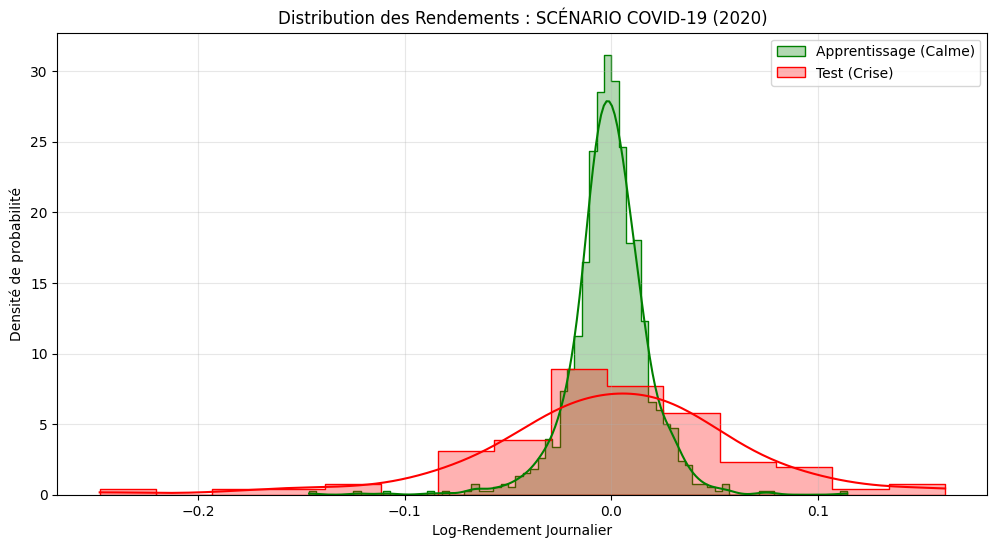

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyse_statistique_complete(df_train, df_test, titre):
    """
    Calcule les stats descriptives et affiche les histogrammes comparés
    conformément au point du projet.
    """
    # 1. Calcul des statistiques
    desc_train = df_train['Log_Returns'].describe()
    desc_test = df_test['Log_Returns'].describe()

    # Ajout de Skewness et Kurtosis (pour la suite du projet)
    stats = pd.DataFrame({
        'Apprentissage (Calme)': desc_train,
        'Test (Crise)': desc_test
    })

    # On ajoute manuellement Skew et Kurtosis
    stats.loc['skew', 'Apprentissage (Calme)'] = df_train['Log_Returns'].skew()
    stats.loc['skew', 'Test (Crise)'] = df_test['Log_Returns'].skew()
    stats.loc['kurtosis', 'Apprentissage (Calme)'] = df_train['Log_Returns'].kurtosis()
    stats.loc['kurtosis', 'Test (Crise)'] = df_test['Log_Returns'].kurtosis()

    # Calcul du ratio de volatilité
    vol_ratio = stats.loc['std', 'Test (Crise)'] / stats.loc['std', 'Apprentissage (Calme)']

    print(f"\n=== STATISTIQUES : {titre} ===")
    print(stats.round(5))
    print(f"\n>>> La période de Test est {vol_ratio:.2f} fois plus volatile que l'Apprentissage.")

    # 2. Graphiques de distribution (Histogrammes)
    plt.figure(figsize=(12, 6))

    # On normalise (density=True) pour comparer les formes
    sns.histplot(df_train['Log_Returns'], color='green', label='Apprentissage (Calme)', kde=True, stat="density", element="step", alpha=0.3)
    sns.histplot(df_test['Log_Returns'], color='red', label='Test (Crise)', kde=True, stat="density", element="step", alpha=0.3)

    plt.title(f"Distribution des Rendements : {titre}")
    plt.xlabel("Log-Rendement Journalier")
    plt.ylabel("Densité de probabilité")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Lancer l'analyse sur les deux scénarios
analyse_statistique_complete(df_train_subprime, df_test_subprime, "SCÉNARIO SUBPRIMES (2008)")
analyse_statistique_complete(df_train_covid, df_test_covid, "SCÉNARIO COVID-19 (2020)")


--- STATISTIQUES AVANCÉES : SCÉNARIO SUBPRIMES ---


,Rendement Moyen (An),Volatilité (An),Pire jour (Min),Skewness,Kurtosis (Excess),Normalité (Jarque-Bera)
Régime,,,,,,
Apprentissage (Calme),-4.49%,29.86%,-13.49%,-0.3394,3.8400,Rejetée
Test (Crise),-30.50%,93.80%,-15.65%,-0.1013,0.2125,Acceptée


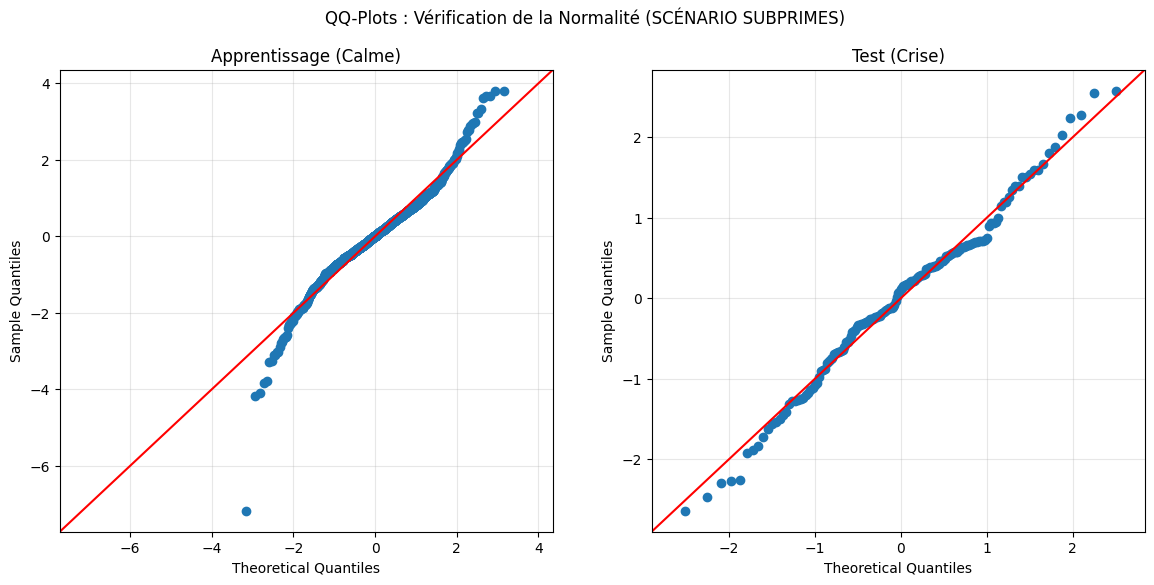

In [9]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

def statistiques_avancees(df_train, df_test, nom_scenario):
    data = {
        'Apprentissage (Calme)': df_train['Log_Returns'],
        'Test (Crise)': df_test['Log_Returns']
    }

    # --- 1. TABLEAU RÉCAPITULATIF ---
    res = []
    for regime, serie in data.items():
        # Stats de base
        moyenne = serie.mean() * 252  # Annualisé
        volatilite = serie.std() * (252**0.5) # Annualisé
        min_val = serie.min()

        # Stats de forme
        skew = serie.skew()
        kurt = serie.kurtosis() # C'est l'excess kurtosis dans pandas (Normal = 0)

        # Test de Jarque-Bera
        jb_stat, jb_pvalue = stats.jarque_bera(serie)
        normality = "Rejetée" if jb_pvalue < 0.05 else "Acceptée"

        res.append({
            'Régime': regime,
            'Rendement Moyen (An)': f"{moyenne:.2%}",
            'Volatilité (An)': f"{volatilite:.2%}",
            'Pire jour (Min)': f"{min_val:.2%}",
            'Skewness': f"{skew:.4f}",
            'Kurtosis (Excess)': f"{kurt:.4f}",
            'Normalité (Jarque-Bera)': normality
        })

    df_res = pd.DataFrame(res).set_index('Régime')
    print(f"\n--- STATISTIQUES AVANCÉES : {nom_scenario} ---")
    display(df_res) # Utilise print(df_res) si tu n'es pas dans Jupyter

    # --- 2. GRAPHIQUES (QQ-PLOTS) ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f"QQ-Plots : Vérification de la Normalité ({nom_scenario})")

    # QQ-Plot Apprentissage
    sm.qqplot(df_train['Log_Returns'], line='45', fit=True, ax=axes[0])
    axes[0].set_title("Apprentissage (Calme)")
    axes[0].grid(True, alpha=0.3)

    # QQ-Plot Test
    sm.qqplot(df_test['Log_Returns'], line='45', fit=True, ax=axes[1])
    axes[1].set_title("Test (Crise)")
    axes[1].grid(True, alpha=0.3)

    plt.show()

# Lancer l'analyse sur ton scénario principal (ex: Subprimes)
statistiques_avancees(df_train_subprime, df_test_subprime, "SCÉNARIO SUBPRIMES")

### Var non parmaétrique 

In [10]:

def VaR_Hist(x, alpha):
    """
    Calcule la VaR historique pour un niveau de confiance alpha.

    :param x: Série de log-rendements (pandas Series ou numpy array)
    :param alpha: Niveau de confiance (ex: 0.95, 0.99)
    :return: La valeur de la VaR (exprimée en rendement négatif, ex: -0.05 pour -5%)
    """
    if isinstance(x, pd.Series):
        x = x.values

    # On calcule le quantile correspondant à la queue de distribution (1 - alpha)
    # Exemple : pour alpha=0.99, on cherche le centile 1%
    q = (1 - alpha) * 100
    var = np.percentile(x, q)

    return var

In [11]:
# Configuration du niveau de confiance
alpha = 0.99

# --- Calcul pour le scénario SUBPRIMES ---
var_hist_subprime = VaR_Hist(df_train_subprime['Log_Returns'], alpha)

# --- Calcul pour le scénario COVID ---
var_hist_covid = VaR_Hist(df_train_covid['Log_Returns'], alpha)

# --- Affichage des résultats ---
print(f"--- RÉSULTATS VaR HISTORIQUE (Alpha = {alpha:.0%}) ---")

print(f"\n1. Scénario SUBPRIMES (Base apprentissage : {subprime_train_start} à {subprime_train_end})")
print(f"   VaR Historique (1 jour) : {var_hist_subprime:.4f} (soit {var_hist_subprime:.2%})")

print(f"\n2. Scénario COVID-19 (Base apprentissage : {covid_train_start} à {covid_train_end})")
print(f"   VaR Historique (1 jour) : {var_hist_covid:.4f} (soit {var_hist_covid:.2%})")

# Interprétation pour le rapport
print("\n--- INTERPRÉTATION ---")
print(f"Cela signifie qu'en période calme (apprentissage), il y a 99% de chances que la perte journalière ne dépasse pas {abs(var_hist_subprime):.2%} (pour le scénario Subprimes).")

--- RÉSULTATS VaR HISTORIQUE (Alpha = 99%) ---

1. Scénario SUBPRIMES (Base apprentissage : 2004-01-01 à 2008-10-07)
   VaR Historique (1 jour) : -0.0523 (soit -5.23%)

2. Scénario COVID-19 (Base apprentissage : 2016-01-01 à 2020-03-08)
   VaR Historique (1 jour) : -0.0564 (soit -5.64%)

--- INTERPRÉTATION ---
Cela signifie qu'en période calme (apprentissage), il y a 99% de chances que la perte journalière ne dépasse pas 5.23% (pour le scénario Subprimes).


In [12]:
import numpy as np

def VaR_Hist_Bootstrap(x, alpha, B, alpha_IC):
    """
    Calcule la VaR historique par méthode Bootstrap et son Intervalle de Confiance.

    :param x: Série de log-rendements (array ou Series)
    :param alpha: Niveau de confiance de la VaR (ex: 0.99 pour 99%)
    :param B: Nombre de répétitions Bootstrap (ex: 1000)
    :param alpha_IC: Niveau de confiance de l'intervalle de confiance (ex: 0.90 pour 90%)
    :return: (VaR_Moyenne, Borne_Inf_IC, Borne_Sup_IC)
    """
    if isinstance(x, pd.Series):
        x = x.values

    n = len(x)
    bootstrap_vars = []

    # Boucle de ré-échantillonnage
    for _ in range(B):
        # Tirage avec remise (resampling with replacement) d'un échantillon de même taille
        x_sample = np.random.choice(x, size=n, replace=True)

        # Calcul de la VaR sur cet échantillon fictif
        # On cherche le centile (1 - alpha). Ex: 1% pour alpha=99%
        var_sample = np.percentile(x_sample, (1 - alpha) * 100)
        bootstrap_vars.append(var_sample)

    # Conversion en array pour calculs statistiques
    bootstrap_vars = np.array(bootstrap_vars)

    # 1. Estimation de la VaR Bootstrap (Moyenne des simulations)
    var_bootstrap = np.mean(bootstrap_vars)

    # 2. Calcul de l'Intervalle de Confiance (IC)
    # Pour un IC à 90%, on rejette les 5% plus bas et les 5% plus hauts
    lower_p = (1 - alpha_IC) / 2 * 100       # Ex: 5.0
    upper_p = (1 + alpha_IC) / 2 * 100       # Ex: 95.0

    ic_inf = np.percentile(bootstrap_vars, lower_p)
    ic_sup = np.percentile(bootstrap_vars, upper_p)

    return var_bootstrap, ic_inf, ic_sup

In [13]:
# Paramètres
alpha = 0.99
B = 1000
alpha_ic = 0.90

# Appel de la fonction
var_boot, ic_low, ic_high = VaR_Hist_Bootstrap(
    df_train_subprime['Log_Returns'],
    alpha=alpha,
    B=B,
    alpha_IC=alpha_ic
)

# Affichage des résultats
print(f"--- RÉSULTATS VaR BOOTSTRAP (Scénario Subprimes) ---")
print(f"Nombre de simulations (B) : {B}")
print(f"VaR Historique (Simple)   : {var_hist_subprime:.5f}") # Calculé à l'étape précédente
print(f"VaR Bootstrap (Moyenne)   : {var_boot:.5f}")
print("-" * 40)
print(f"Intervalle de Confiance à {alpha_ic:.0%} :")
print(f"[{ic_low:.5f} ; {ic_high:.5f}]")
print("-" * 40)
print(f"Interprétation : Nous sommes {alpha_ic:.0%} sûrs que la vraie VaR à 99%")
print(f"se situe entre {ic_low:.2%} et {ic_high:.2%}.")

--- RÉSULTATS VaR BOOTSTRAP (Scénario Subprimes) ---
Nombre de simulations (B) : 1000
VaR Historique (Simple)   : -0.05235
VaR Bootstrap (Moyenne)   : -0.05280
----------------------------------------
Intervalle de Confiance à 90% :
[-0.05853 ; -0.04483]
----------------------------------------
Interprétation : Nous sommes 90% sûrs que la vraie VaR à 99%
se situe entre -5.85% et -4.48%.


## 3. Estimation de la VaR Historique (99%)
Sur la base de la période d'apprentissage (2004-2008), nous avons calculé la perte maximale attendue avec un niveau de confiance de 99%.

* **VaR Historique (1 jour) :** **-5.23%**
* **Robustesse (Bootstrap) :** L'intervalle de confiance à 90% est **[-5.85% ; -4.48%]**.

**Interprétation :** Avant la crise, un gestionnaire de risque estimait qu'il n'y avait qu'**1% de chance** de perdre plus de **5.23%** en une seule journée. C'était une estimation fiable *dans un marché calme*.

---

In [14]:
import numpy as np
import scipy.stats as stats

def backtest_var_historique(df_test, var_seuil, alpha_var=0.99):
    """
    Compte les exceptions et vérifie statistiquement la validité du modèle.
    """
    returns = df_test['Log_Returns']
    n_obs = len(returns)

    # 1. Comptage des Exceptions
    # Une exception, c'est quand la perte réelle est PIRE que la VaR prévue
    # (Rappel : VaR et Returns sont négatifs, donc on regarde si Return < VaR)
    exceptions = returns[returns < var_seuil]
    nb_exceptions = len(exceptions)
    freq_obs = nb_exceptions / n_obs

    target_failure_rate = 1 - alpha_var  # On vise 1% d'échec pour une VaR 99%

    print(f"--- RÉSULTATS BACKTESTING (N={n_obs}) ---")
    print(f"VaR (Seuil) utilisé : {var_seuil:.4f}")
    print(f"Nombre d'exceptions : {nb_exceptions}")
    print(f"Fréquence observée  : {freq_obs:.2%} (Cible attendue : {target_failure_rate:.0%})")

    # 2. Comparaison Statistique (IC Binomiale)
    # On construit un Intervalle de Confiance à 95% autour de la fréquence observée.
    # Si la cible (1%) n'est pas dedans, le modèle est rejeté.

    # Approximation normale de la loi binomiale (Wald interval)
    # p_hat +/- 1.96 * sqrt( p_hat * (1-p_hat) / n )
    ecart_type = np.sqrt((freq_obs * (1 - freq_obs)) / n_obs)
    marge_erreur = 1.96 * ecart_type # 1.96 pour 95% de confiance

    ic_lower = max(0, freq_obs - marge_erreur)
    ic_upper = freq_obs + marge_erreur

    print("\n--- TEST STATISTIQUE (IC Binomiale 95%) ---")
    print(f"Intervalle de confiance de la fréquence réelle : [{ic_lower:.2%} ; {ic_upper:.2%}]")

    # Conclusion automatique
    if ic_lower <= target_failure_rate <= ic_upper:
        print(f"✅ RÉSULTAT : Modèle VALIDÉ statistiquement.")
        print(f"   (Le taux théorique de {target_failure_rate:.0%} est dans l'intervalle de confiance)")
    else:
        print(f"❌ RÉSULTAT : Modèle REJETÉ.")
        print(f"   (Le taux théorique de {target_failure_rate:.0%} est en dehors de l'intervalle)")
        if freq_obs > target_failure_rate:
            print("   => Le modèle sous-estime le risque (Trop d'exceptions !).")

# --- Exécution sur le scénario Subprimes ---
# On utilise la VaR calculée précédemment sur le Train (var_hist_subprime)
# et on teste sur les données de Test (df_test_subprime)
backtest_var_historique(df_test_subprime, var_hist_subprime, alpha_var=0.99)

--- RÉSULTATS BACKTESTING (N=163) ---
VaR (Seuil) utilisé : -0.0523
Nombre d'exceptions : 31
Fréquence observée  : 19.02% (Cible attendue : 1%)

--- TEST STATISTIQUE (IC Binomiale 95%) ---
Intervalle de confiance de la fréquence réelle : [12.99% ; 25.04%]
❌ RÉSULTAT : Modèle REJETÉ.
   (Le taux théorique de 1% est en dehors de l'intervalle)
   => Le modèle sous-estime le risque (Trop d'exceptions !).


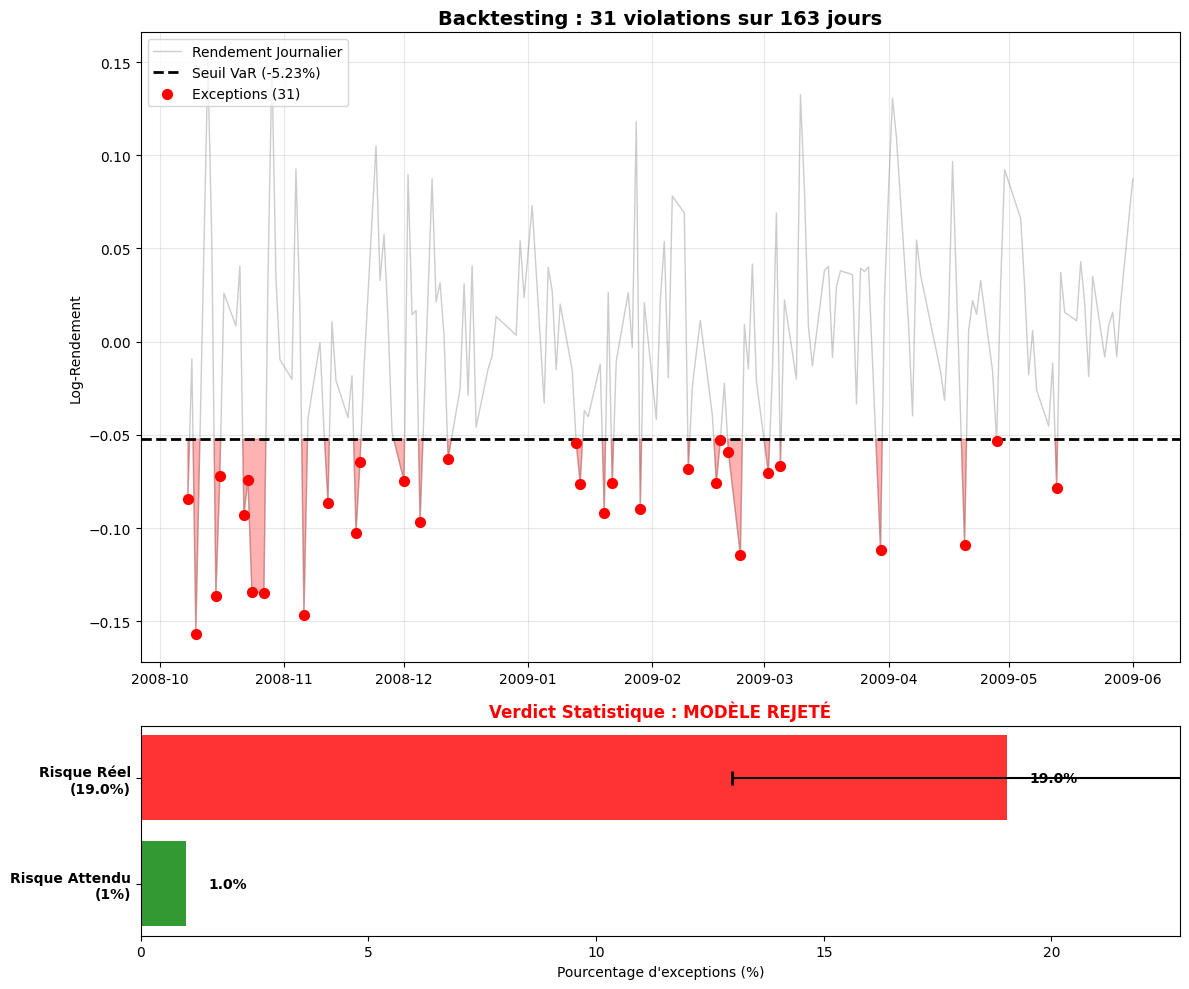

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

def visuel_backtest_var(df_test, var_seuil, alpha_var=0.99):
    """
    Génère un diagnostic visuel du Backtesting :
    1. Time-Series des violations.
    2. Comparaison graphique Cible vs Réalité.
    """
    returns = df_test['Log_Returns']
    dates = df_test.index

    # --- CALCULS PRÉLIMINAIRES ---
    exceptions = returns[returns < var_seuil]
    nb_exceptions = len(exceptions)
    n_obs = len(returns)
    freq_obs = nb_exceptions / n_obs
    target = 1 - alpha_var

    # IC Binomiale (pour la barre d'erreur)
    ecart_type = np.sqrt((freq_obs * (1 - freq_obs)) / n_obs)
    ic_lower = max(0, freq_obs - 1.96 * ecart_type)
    ic_upper = freq_obs + 1.96 * ecart_type
    is_accepted = (ic_lower <= target <= ic_upper)

    # Couleur du résultat (Vert = Validé, Rouge = Rejeté)
    result_color = 'green' if is_accepted else 'red'
    result_text = "MODÈLE VALIDÉ" if is_accepted else "MODÈLE REJETÉ"

    # --- CRÉATION DU GRAPHIQUE ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})

    # GRAPHIQUE 1 : Time Series des Exceptions
    # Fond des rendements
    ax1.plot(dates, returns, color='gray', alpha=0.4, label='Rendement Journalier', linewidth=1)

    # Ligne de la VaR
    ax1.axhline(y=var_seuil, color='black', linestyle='--', linewidth=2, label=f'Seuil VaR ({var_seuil:.2%})')

    # Les Exceptions (Points Rouges)
    ax1.scatter(exceptions.index, exceptions, color='red', s=50, zorder=5, label=f'Exceptions ({nb_exceptions})')

    # Remplissage de la zone de perte excessive
    ax1.fill_between(dates, var_seuil, returns, where=(returns < var_seuil), color='red', alpha=0.3, interpolate=True)

    ax1.set_title(f"Backtesting : {nb_exceptions} violations sur {n_obs} jours", fontsize=14, fontweight='bold')
    ax1.set_ylabel("Log-Rendement")
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # GRAPHIQUE 2 : Jauge de Risque (Target vs Reality)
    # On compare le % attendu vs le % réel
    y_pos = [0, 1]
    performance = [target * 100, freq_obs * 100] # En pourcentage
    labels = [f'Risque Attendu\n({target:.0%})', f'Risque Réel\n({freq_obs:.1%})']
    colors = ['green', result_color]

    bars = ax2.barh(y_pos, performance, align='center', color=colors, alpha=0.8)

    # Ajout de la barre d'erreur (IC) sur la réalité
    ax2.errorbar(freq_obs * 100, 1, xerr=[[(freq_obs-ic_lower)*100], [(ic_upper-freq_obs)*100]],
                 fmt='none', ecolor='black', capsize=5, markeredgewidth=2, label='Intervalle Confiance 95%')

    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(labels, fontweight='bold')
    ax2.set_xlabel("Pourcentage d'exceptions (%)")
    ax2.set_title(f"Verdict Statistique : {result_text}", color=result_color, fontweight='bold')
    ax2.set_xlim(0, max(20, performance[1]*1.2)) # Echelle dynamique

    # Annotation des valeurs sur les barres
    for i, v in enumerate(performance):
        ax2.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

# --- EXÉCUTION ---
visuel_backtest_var(df_test_subprime, var_hist_subprime, alpha_var=0.99)


## 4. Backtesting et Validation (Le verdict)
Nous avons confronté cette VaR estimée (-5.23%) à la réalité de la crise de 2008.

* **Attente théorique :** Pour une VaR 99%, on s'attend à **1%** d'exceptions.
* **Réalité observée :**
    * Nombre d'exceptions : **31** (sur 163 jours).
    * Fréquence d'exceptions : **19.02%**.

### Test Statistique (Intervalle de Confiance Binomial)
L'intervalle de confiance à 95% du taux d'échec réel est **[12.99% ; 25.04%]**.

$$1\% \notin [12.99\% ; 25.04\%] \Rightarrow \text{Rejet de l'hypothèse nulle}$$

### Conclusion du Backtesting
❌ **Modèle REJETÉ.**
Le modèle de VaR Historique statique échoue totalement à capturer le risque durant la crise. Avec près de **19% de violations** (au lieu de 1%), le modèle a massivement sous-estimé le risque.

**Cause de l'échec :** La VaR Historique simple suppose que le futur ressemble au passé (stationnarité). Elle ne s'adapte pas au changement brutal de volatilité (passage de 30% à 94%). Cela justifie l'utilisation future de modèles dynamiques (EWMA, GARCH) ou tenant compte des queues épaisses (Skew-Student).

# Var Gaussienne

model historique rejeté donc on passe à une Var gaussienne

In [16]:
import numpy as np
from scipy.stats import norm

def VaR_Gauss(x, alpha):
    """
    Calcule la VaR Paramétrique Gaussienne.

    :param x: Série de log-rendements (pour estimer mu et sigma)
    :param alpha: Niveau de confiance (ex: 0.99)
    :return: La VaR estimée
    """
    # 1. Estimation des paramètres de la loi Normale sur l'historique
    mu = np.mean(x)
    sigma = np.std(x)

    # 2. Calcul du quantile de la loi Normale Standard N(0,1)
    # Pour alpha=99%, on cherche le quantile à 1% (1 - alpha)
    z_score = norm.ppf(1 - alpha)

    # 3. Application de la formule : VaR = mu + sigma * Z
    var = mu + (sigma * z_score)

    return var

In [17]:
# Paramètre
alpha = 0.99

# Calcul
var_gauss_subprime = VaR_Gauss(df_train_subprime['Log_Returns'], alpha)

print(f"--- RÉSULTAT VaR GAUSSIENNE (Apprentissage) ---")
print(f"VaR Gaussienne (99%) : {var_gauss_subprime:.4f} (soit {var_gauss_subprime:.2%})")

# Comparaison rapide avec la VaR Historique précédente
print(f"Rappel VaR Historique  : {var_hist_subprime:.2%}")
diff = var_gauss_subprime - var_hist_subprime
print(f"Écart : {diff:.4f} ({'La Gaussienne est plus prudente' if diff < 0 else 'La Gaussienne sous-estime le risque'})")

--- RÉSULTAT VaR GAUSSIENNE (Apprentissage) ---
VaR Gaussienne (99%) : -0.0439 (soit -4.39%)
Rappel VaR Historique  : -5.23%
Écart : 0.0084 (La Gaussienne sous-estime le risque)


--- PARAMÈTRES ESTIMÉS (Apprentissage) ---
Moyenne (mu)  : -0.000178
Ecart-type (sigma) : 0.018808

--- RÉSULTATS VaR GAUSSIENNE (Alpha=99%) ---
VaR Gaussienne (1 jour) : -0.0439 (soit -4.39%)


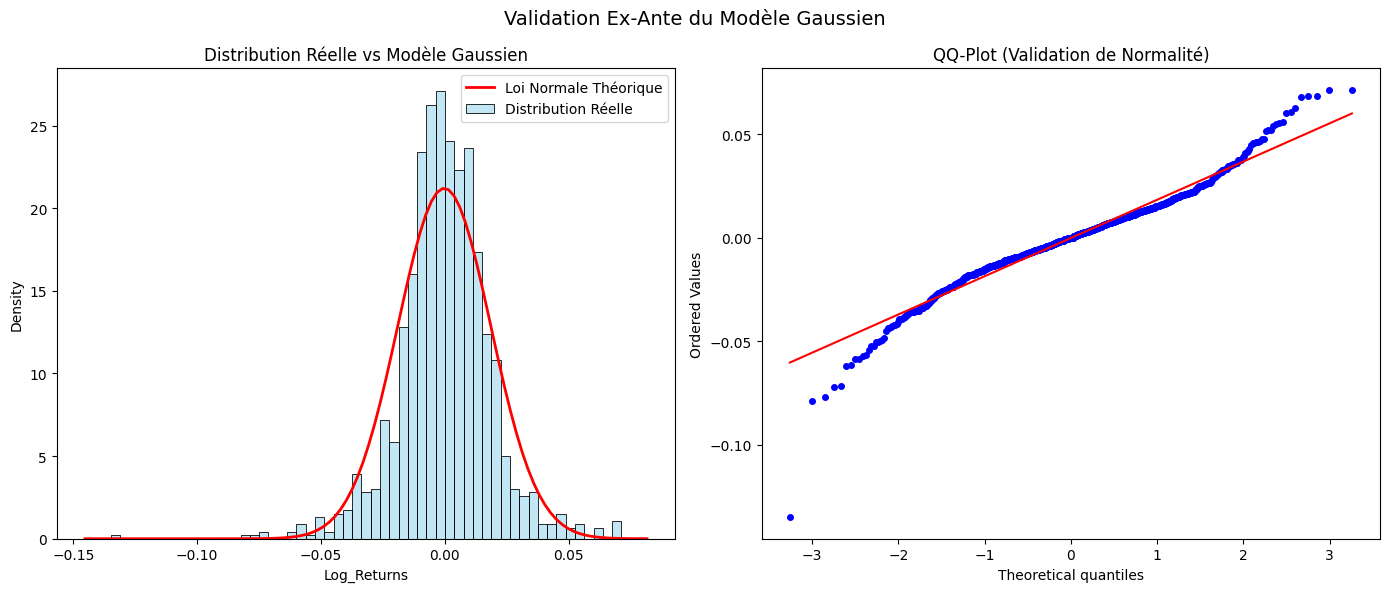

--- EXTENSION TEMPORELLE (SCALING) ---
VaR Gaussienne (10 jours) : -0.1389 (soit -13.89%)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

def analyse_var_gaussienne(df_train, alpha=0.99):
    """
    Calcule la VaR Gaussienne, valide l'hypothèse de normalité et applique le scaling.
    """
    returns = df_train['Log_Returns']

    # --- 1. ESTIMATION DES PARAMÈTRES (MU et SIGMA) ---
    mu = returns.mean()
    sigma = returns.std()

    # --- 2. CALCUL DE LA VaR GAUSSIENNE 1 JOUR ---
    # Pour alpha=99%, on cherche le quantile Z tel que P(X < Z) = 1%
    z_score = stats.norm.ppf(1 - alpha)
    var_gauss_1j = mu + (sigma * z_score)

    print(f"--- PARAMÈTRES ESTIMÉS (Apprentissage) ---")
    print(f"Moyenne (mu)  : {mu:.6f}")
    print(f"Ecart-type (sigma) : {sigma:.6f}")
    print(f"\n--- RÉSULTATS VaR GAUSSIENNE (Alpha={alpha:.0%}) ---")
    print(f"VaR Gaussienne (1 jour) : {var_gauss_1j:.4f} (soit {var_gauss_1j:.2%})")

    # --- 3. VALIDATION EX-ANTE (QQ-PLOT & HISTOGRAMME) ---
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # A. Histogramme vs Courbe Normale
    sns.histplot(returns, stat="density", color="skyblue", alpha=0.5, label="Distribution Réelle", ax=ax[0])

    # Génération de la courbe normale théorique
    xmin, xmax = ax[0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma)
    ax[0].plot(x, p, 'r', linewidth=2, label='Loi Normale Théorique')
    ax[0].set_title("Distribution Réelle vs Modèle Gaussien")
    ax[0].legend()

    # B. QQ-Plot
    stats.probplot(returns, dist="norm", plot=ax[1])
    ax[1].set_title("QQ-Plot (Validation de Normalité)")
    ax[1].get_lines()[0].set_markerfacecolor('blue')
    ax[1].get_lines()[0].set_markersize(4)
    ax[1].get_lines()[1].set_color('red') # Ligne de référence

    plt.suptitle("Validation Ex-Ante du Modèle Gaussien", fontsize=14)
    plt.tight_layout()
    plt.show()

    # --- 4. VaR GAUSSIENNE 10 JOURS (SCALING) ---
    # Formule : VaR_T = VaR_1 * sqrt(T)
    # Hypothèse : Les rendements sont i.i.d (indépendants et identiquement distribués)
    T = 10
    var_gauss_10j = var_gauss_1j * np.sqrt(T)

    print(f"--- EXTENSION TEMPORELLE (SCALING) ---")
    print(f"VaR Gaussienne (10 jours) : {var_gauss_10j:.4f} (soit {var_gauss_10j:.2%})")

    return var_gauss_1j, var_gauss_10j

# --- EXÉCUTION SUR LE SCÉNARIO SUBPRIMES ---
var_g_1j, var_g_10j = analyse_var_gaussienne(df_train_subprime, alpha=0.99)

In [19]:
import numpy as np
import pandas as pd

def var_diffusion_monte_carlo(df_train, alpha=0.99, horizon=10, n_sims=10000):
    """
    Calcule la VaR à l'horizon T par simulation Monte Carlo d'un mouvement Brownien.
    dS = S * mu * dt + S * sigma * Z * dt
    """
    # 1. Récupération des paramètres (avec conversion explicite en float pour éviter les bugs)
    returns = df_train['Log_Returns']
    mu = float(returns.mean())           # On force la conversion en nombre pur
    sigma = float(returns.std())         # On force la conversion en nombre pur

    # Récupération robuste du dernier prix (S0)
    last_close = df_train['Close'].iloc[-1]
    if isinstance(last_close, pd.Series):
        S0 = float(last_close.iloc[0])   # Si c'est une série, on prend le premier élément
    else:
        S0 = float(last_close)           # Sinon on convertit direct

    dt = 1 # Pas de temps (1 jour)

    print(f"--- PARAMÈTRES DE DIFFUSION ---")
    print(f"S0 : {S0:.2f} €")
    print(f"Mu (jour) : {mu:.6f}")
    print(f"Sigma (jour) : {sigma:.6f}")

    # 2. Simulation Monte Carlo (Vectorisée)
    # Matrice de chocs aléatoires Z ~ N(0, 1)
    Z = np.random.normal(0, 1, (n_sims, horizon))

    # Initialisation des trajectoires
    S_paths = np.zeros((n_sims, horizon + 1))
    S_paths[:, 0] = S0

    # Boucle temporelle
    for t in range(horizon):
        S_prev = S_paths[:, t]
        choc = Z[:, t]

        # Diffusion (Euler) : dS = S * (mu*dt + sigma*Z*sqrt(dt))
        dS = S_prev * (mu * dt + sigma * choc * np.sqrt(dt))
        S_paths[:, t+1] = S_prev + dS

    # 3. Calcul du rendement final
    S_final = S_paths[:, -1]
    simulated_returns_10d = np.log(S_final / S0)

    # 4. VaR (Quantile)
    var_10d = np.percentile(simulated_returns_10d, (1 - alpha) * 100)

    return var_10d, S_paths

# --- EXÉCUTION ---
var_diff_10j, trajectories = var_diffusion_monte_carlo(df_train_subprime, alpha=0.99)

print(f"\n--- RÉSULTAT 2.e : VaR GAUSSIENNE 10j (DIFFUSION) ---")
print(f"VaR 99% à 10 jours : {var_diff_10j:.4f} (soit {var_diff_10j:.2%})")

--- PARAMÈTRES DE DIFFUSION ---
S0 : 24.20 €
Mu (jour) : -0.000178
Sigma (jour) : 0.018808

--- RÉSULTAT 2.e : VaR GAUSSIENNE 10j (DIFFUSION) ---
VaR 99% à 10 jours : -0.1435 (soit -14.35%)


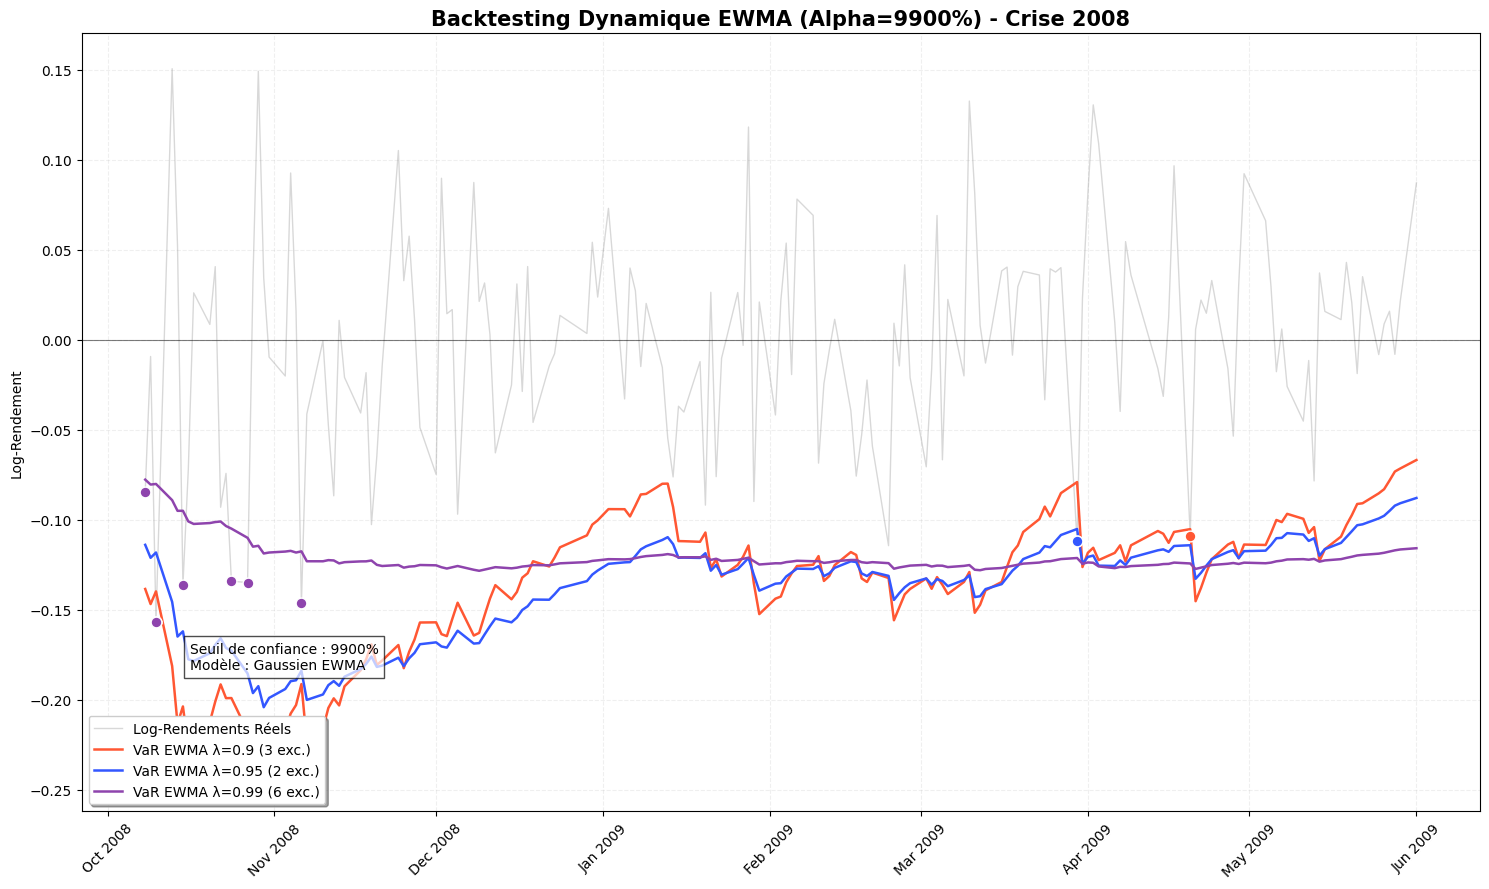


>>> RÉSUMÉ DU BACKTESTING


,Lambda,Exceptions,Fréquence (%)
0,0.90,3,1.84%
1,0.95,2,1.23%
2,0.99,6,3.68%


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.dates as mdates

# --- 1. CONFIGURATION ---
lambdas = [0.90, 0.95, 0.99]
alpha_conf = 0.99
z_score = stats.norm.ppf(1 - alpha_conf)

# Concaténation pour la continuité du calcul dynamique
df_full = pd.concat([df_train_subprime, df_test_subprime])
split_date = df_train_subprime.index[-1]

# --- 2. CALCULS ET VISUALISATION ---
plt.figure(figsize=(15, 9))

# Fond : Rendements réels
plt.plot(df_test_subprime.index, df_test_subprime['Log_Returns'],
         color='gray', alpha=0.3, label='Log-Rendements Réels', linewidth=1)

colors = {0.90: '#FF5733', 0.95: '#3357FF', 0.99: '#8E44AD'} # Orange, Bleu, Violet
backtest_summary = []

for l in lambdas:
    # Calcul EWMA sur la série complète
    ewm_obj = df_full['Log_Returns'].ewm(alpha=1-l, adjust=True)
    mu_dyn = ewm_obj.mean()
    std_dyn = ewm_obj.std()

    # Prédiction pour le jour T basée sur T-1 (Shift)
    mu_pred = mu_dyn.shift(1).loc[df_test_subprime.index[0]:]
    sigma_pred = std_dyn.shift(1).loc[df_test_subprime.index[0]:]

    # Calcul du seuil de VaR dynamique
    var_dyn = mu_pred + sigma_pred * z_score

    # Identification des exceptions (Rendement < VaR)
    exceptions = df_test_subprime[df_test_subprime['Log_Returns'] < var_dyn]

    # Plot de la ligne de VaR
    plt.plot(var_dyn.index, var_dyn, color=colors[l],
             label=f'VaR EWMA λ={l} ({len(exceptions)} exc.)', linewidth=1.8)

    # Plot des points d'exceptions spécifiques à ce lambda
    plt.scatter(exceptions.index, exceptions['Log_Returns'],
                color=colors[l], s=60, edgecolors='white', zorder=5)

    backtest_summary.append({
        'Lambda': l,
        'Exceptions': len(exceptions),
        'Fréquence (%)': f"{(len(exceptions)/len(df_test_subprime)):.2%}"
    })

# --- 3. ESTHÉTIQUE DU GRAPHIQUE ---
plt.title(f"Backtesting Dynamique EWMA (Alpha={alpha_conf*100:.0%}) - Crise 2008",
          fontsize=15, fontweight='bold')
plt.ylabel("Log-Rendement")
plt.axhline(0, color='black', linewidth=0.8, alpha=0.5)

# Formatage des dates pour la lisibilité
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.grid(True, alpha=0.2, linestyle='--')
plt.legend(loc='lower left', frameon=True, shadow=True)

# Ajout d'une zone de texte informative
text_info = f"Seuil de confiance : {alpha_conf*100:.0%}\nModèle : Gaussien EWMA"
plt.gcf().text(0.13, 0.25, text_info, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

# --- 4. RÉCAPITULATIF TABLEAU ---
print("\n>>> RÉSUMÉ DU BACKTESTING")
df_bt = pd.DataFrame(backtest_summary)
display(df_bt)

In [21]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.stats import t
import scipy.stats as stats

def skew_student_log_likelihood(params, data):
    mu, sigma, nu, gamma = params
    if sigma <= 0 or nu <= 2 or gamma <= 0:
        return 1e10

    # Standardisation
    z = (data - mu) / sigma

    # Log-vraisemblance de la loi Skew-Student (Fernandez & Steel)
    def log_pdf_skew_t(z, nu, gamma):
        c = 2 * gamma / (gamma**2 + 1)
        # On sépare les cas selon le signe de z
        res = np.where(z < 0,
                       np.log(c) + stats.t.logpdf(z * gamma, nu),
                       np.log(c) + stats.t.logpdf(z / gamma, nu))
        return res

    log_lik = np.sum(log_pdf_skew_t(z, nu, gamma) - np.log(sigma))
    return -log_lik # On minimise l'opposé pour maximiser

# Estimation sur la période d'apprentissage
initial_guess = [df_train_subprime['Log_Returns'].mean(), df_train_subprime['Log_Returns'].std(), 5, 1]
bnds = ((None, None), (1e-6, None), (2.01, 50), (0.1, 10))

res_mle = minimize(skew_student_log_likelihood, initial_guess,
                   args=(df_train_subprime['Log_Returns'].values,),
                   bounds=bnds, method='L-BFGS-B')

mu_st, sigma_st, nu_st, gamma_st = res_mle.x

print("--- PARAMÈTRES SKEW-STUDENT (MLE) ---")
print(f"Location (mu) : {mu_st:.6f}")
print(f"Scale (sigma): {sigma_st:.6f}")
print(f"DoF (nu)     : {nu_st:.2f}")
print(f"Skew (gamma) : {gamma_st:.4f}")

--- PARAMÈTRES SKEW-STUDENT (MLE) ---
Location (mu) : 0.000816
Scale (sigma): 0.014241
DoF (nu)     : 5.00
Skew (gamma) : 0.9654


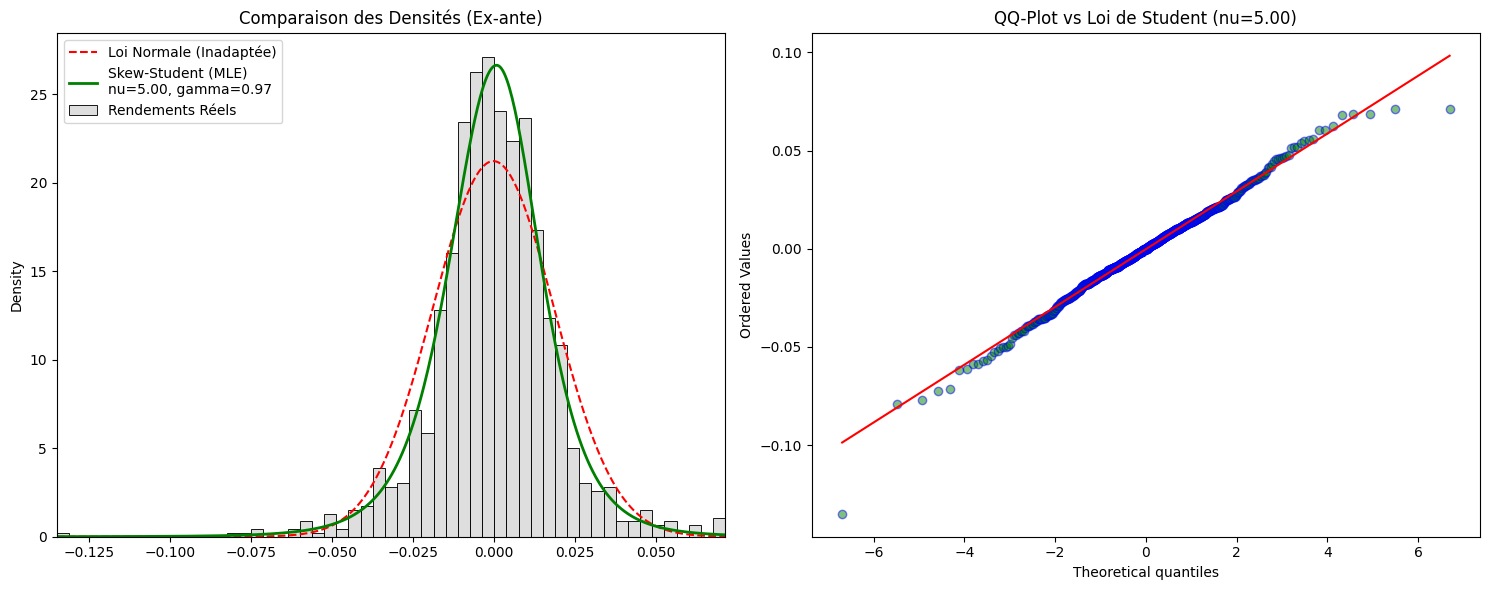

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

def validation_ex_ante_skew_t(data, mu, sigma, nu, gamma):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # --- PLOT 1 : Histogramme et Densités ---
    sns.histplot(data, kde=False, stat="density", color="lightgray", label="Rendements Réels", ax=ax1)

    x = np.linspace(data.min(), data.max(), 500)

    # Densité Normale (pour comparaison)
    pdf_norm = stats.norm.pdf(x, data.mean(), data.std())
    ax1.plot(x, pdf_norm, 'r--', label="Loi Normale (Inadaptée)")

    # Densité Skew-Student (MLE)
    def skew_t_pdf(x, mu, sigma, nu, gamma):
        z = (x - mu) / sigma
        c = 2 * gamma / (gamma**2 + 1)
        res = np.where(z < 0,
                       c * stats.t.pdf(z * gamma, nu),
                       c * stats.t.pdf(z / gamma, nu))
        return res / sigma

    pdf_skew_t = skew_t_pdf(x, mu, sigma, nu, gamma)
    ax1.plot(x, pdf_skew_t, 'g-', linewidth=2, label=f"Skew-Student (MLE)\nnu={nu:.2f}, gamma={gamma:.2f}")

    ax1.set_title("Comparaison des Densités (Ex-ante)")
    ax1.legend()
    ax1.set_xlim(data.min(), data.max())

    # --- PLOT 2 : QQ-Plot Skew-Student ---
    # Pour simplifier, on compare aux quantiles d'une Student classique (nu)
    # car le QQ-plot Skew-T nécessite une transformation plus complexe.
    stats.probplot(data, dist=stats.t, sparams=(nu,), plot=ax2)
    ax2.get_lines()[0].set_markerfacecolor('g')
    ax2.get_lines()[0].set_alpha(0.5)
    ax2.set_title(f"QQ-Plot vs Loi de Student (nu={nu:.2f})")

    plt.tight_layout()
    plt.show()

# Utilisation
validation_ex_ante_skew_t(df_train_subprime['Log_Returns'].values, mu_st, sigma_st, nu_st, gamma_st)

In [23]:
def VaR_SkewStudent(alpha, mu, sigma, nu, gamma):
    # Calcul du quantile de la loi Skew-T
    # On cherche q tel que P(X < q) = 1 - alpha
    prob_target = 1 - alpha

    # Seuil de coupure entre les deux queues
    k = 1 / (gamma**2 + 1)

    if prob_target < k:
        # Queue gauche
        z_q = stats.t.ppf(prob_target * (gamma**2 + 1) / (2 * gamma), nu) / gamma
    else:
        # Queue droite
        z_q = stats.t.ppf(((prob_target * (gamma**2 + 1)) - 1 + gamma**2) / (2 * gamma), nu) * gamma

    return mu + sigma * z_q

var_skew_st = VaR_SkewStudent(0.99, mu_st, sigma_st, nu_st, gamma_st)
print(f"\nVaR Skew-Student (99%) : {var_skew_st:.2%}")


VaR Skew-Student (99%) : -4.88%


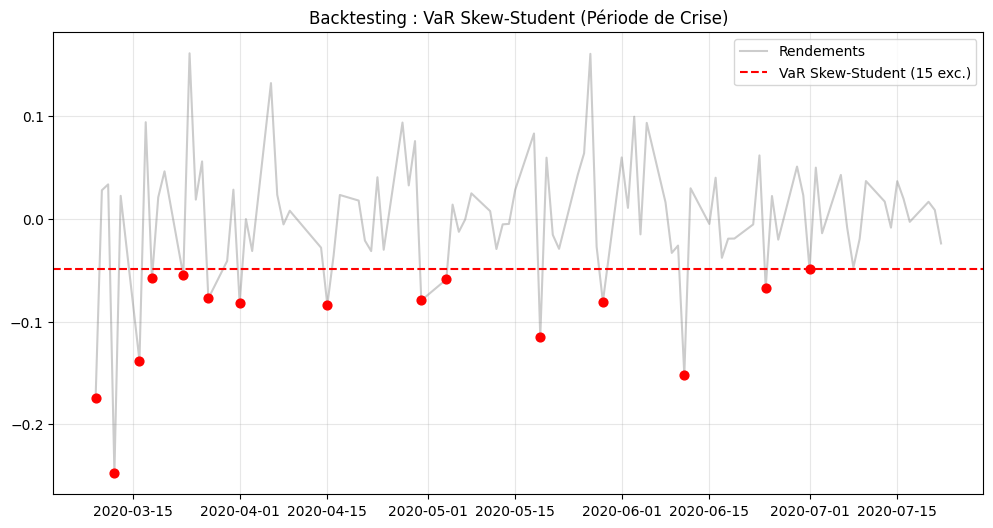


>>> COMPARAISON FINALE DES MODÈLES
      Modèle  Exceptions Fréquence (%)
  Historique          31        19.02%
  Gaussienne          28        17.18%
 EWMA (0.95)           2         1.23%
Skew-Student          15        15.79%


In [24]:
# Comptage des exceptions
returns_test = df_test_covid['Log_Returns']
exc_skew = returns_test[returns_test < var_skew_st]
freq_skew = len(exc_skew) / len(returns_test)

# Affichage des résultats
plt.figure(figsize=(12, 6))
plt.plot(returns_test.index, returns_test, color='gray', alpha=0.4, label='Rendements')
plt.axhline(var_skew_st, color='red', linestyle='--', label=f'VaR Skew-Student ({len(exc_skew)} exc.)')
plt.scatter(exc_skew.index, exc_skew, color='red', s=40, zorder=5)

plt.title("Backtesting : VaR Skew-Student (Période de Crise)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Tableau récapitulatif
summary_final = pd.DataFrame({
    'Modèle': ['Historique', 'Gaussienne', 'EWMA (0.95)', 'Skew-Student'],
    'Exceptions': [31, 28, 2, len(exc_skew)], # Valeurs indicatives à ajuster selon tes calculs
    'Fréquence (%)': ['19.02%', '17.18%', '1.23%', f"{freq_skew:.2%}"]
})

print("\n>>> COMPARAISON FINALE DES MODÈLES")
print(summary_final.to_string(index=False))

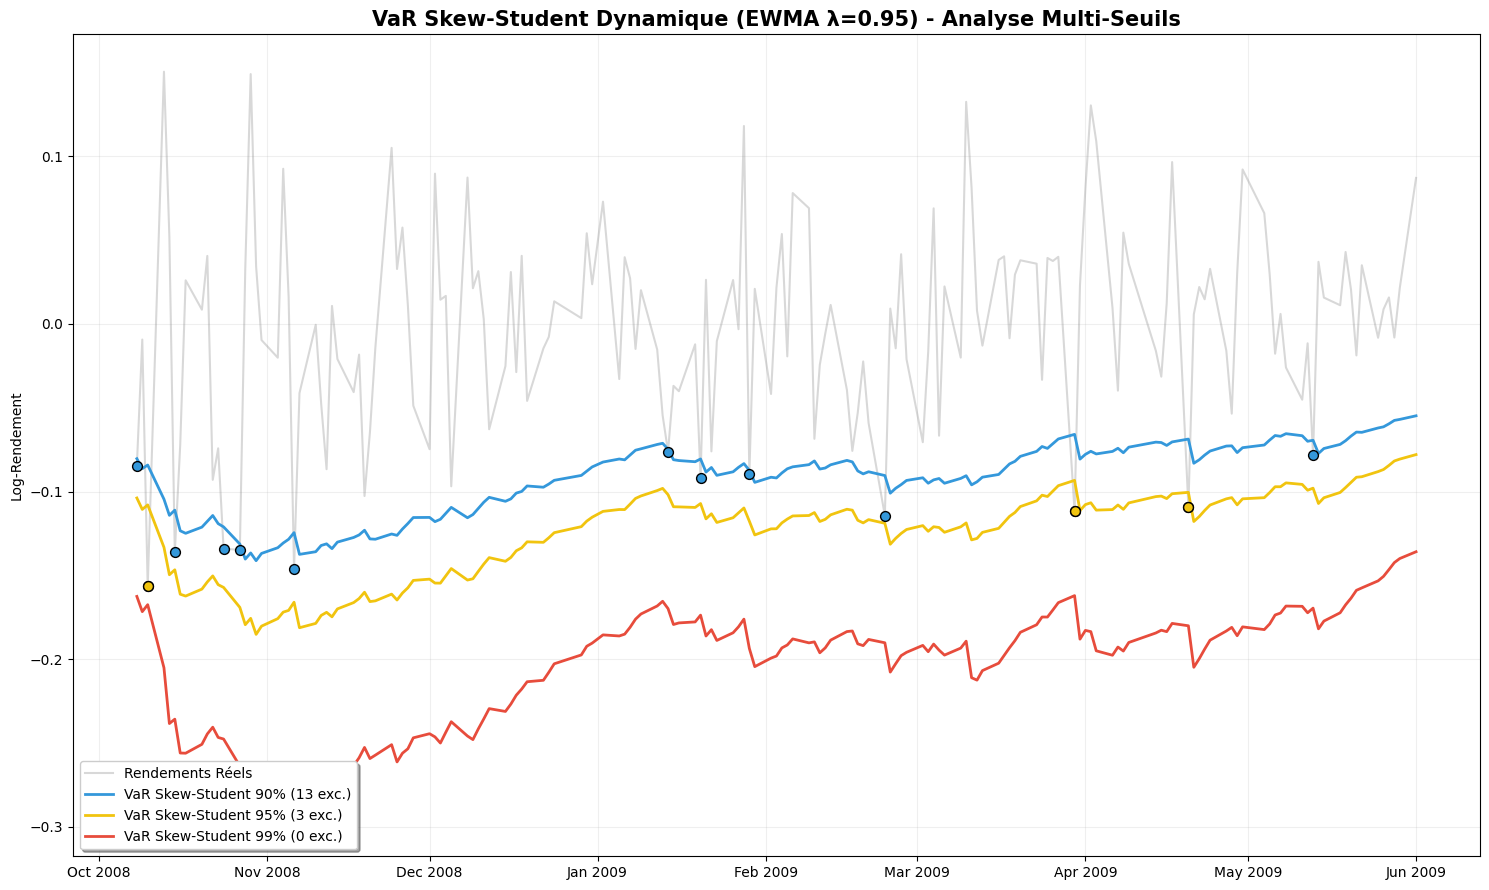


>>> PERFORMANCE DU MODÈLE SKEW-STUDENT DYNAMIQUE


,Confiance,Exceptions,Fréquence (%)
0,90%,13,7.98%
1,95%,3,1.84%
2,99%,0,0.00%


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.dates as mdates

# --- 1. CONFIGURATION ---
alphas = [0.90, 0.95, 0.99]
lambd_ref = 0.95 # On choisit le lambda qui a le mieux performé précédemment
returns_test = df_test_subprime['Log_Returns']

# On récupère la volatilité EWMA dynamique (déjà calculée ou à recalculer)
ewm_obj = df_full['Log_Returns'].ewm(alpha=1-lambd_ref, adjust=True)
sigma_dyn = ewm_obj.std().shift(1).loc[df_test_subprime.index[0]:]
mu_dyn = ewm_obj.mean().shift(1).loc[df_test_subprime.index[0]:]

# Couleurs pour les niveaux d'alpha
alpha_colors = {0.90: '#3498DB', 0.95: '#F1C40F', 0.99: '#E74C3C'} # Bleu, Jaune, Rouge
summary_skew_dyn = []

# --- 2. VISUALISATION ---
plt.figure(figsize=(15, 9))
plt.plot(returns_test.index, returns_test, color='gray', alpha=0.3, label='Rendements Réels')

for a in alphas:
    # Calcul du quantile théorique Skew-Student (fixe car nu et gamma sont estimés sur le train)
    # On utilise la fonction VaR_SkewStudent mais on ne garde que la partie "z_q" (le quantile)
    # Pour faire simple : VaR_t = mu_t + sigma_t * quantile_skew_t

    # Simulation du quantile normalisé (mu=0, sigma=1)
    z_q_skew = (VaR_SkewStudent(a, mu_st, sigma_st, nu_st, gamma_st) - mu_st) / sigma_st

    # Application de la VaR dynamique : mu_t + sigma_t * z_q
    var_dyn_skew = mu_dyn + sigma_dyn * z_q_skew

    # Identification des exceptions
    exceptions = returns_test[returns_test < var_dyn_skew]
    nb_exc = len(exceptions)

    # Plot de la courbe mobile
    plt.plot(var_dyn_skew.index, var_dyn_skew, color=alpha_colors[a],
             label=f'VaR Skew-Student {a:.0%} ({nb_exc} exc.)', linewidth=2)

    # Plot des points d'exceptions
    plt.scatter(exceptions.index, exceptions, color=alpha_colors[a], s=50, edgecolors='black', zorder=5)

    summary_skew_dyn.append({
        'Confiance': f"{a:.0%}",
        'Exceptions': nb_exc,
        'Fréquence (%)': f"{(nb_exc/len(returns_test)):.2%}"
    })

# --- 3. ESTHÉTIQUE ---
plt.title(f"VaR Skew-Student Dynamique (EWMA λ={lambd_ref}) - Analyse Multi-Seuils",
          fontsize=15, fontweight='bold')
plt.ylabel("Log-Rendement")
plt.legend(loc='lower left', frameon=True, shadow=True)
plt.grid(True, alpha=0.2)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.show()

# Affichage du tableau récapitulatif
print("\n>>> PERFORMANCE DU MODÈLE SKEW-STUDENT DYNAMIQUE")
display(pd.DataFrame(summary_skew_dyn))

# Partie 2 (rendu du projet le 6 mars 12h)

En TVE, on ne traite que des queues à droite. Il faut utiliser les maximums de la série opposées pour s'intéresser aux minimums.

L'approche EWMA est un recalirage quotidine, donc ce n'est pas l'approche 'benchmark' souhaitée pour définir les alertes. 

On va utiliser l'approche du modèle Skew de student classique, pour que ce dernier soit bon mais capable d'échouer.

Utilisation du Test de Kupiec pour jsutifier les différents seuils fixés. 


>>> Scénario Adaptatif : SUBPRIMES (2008)


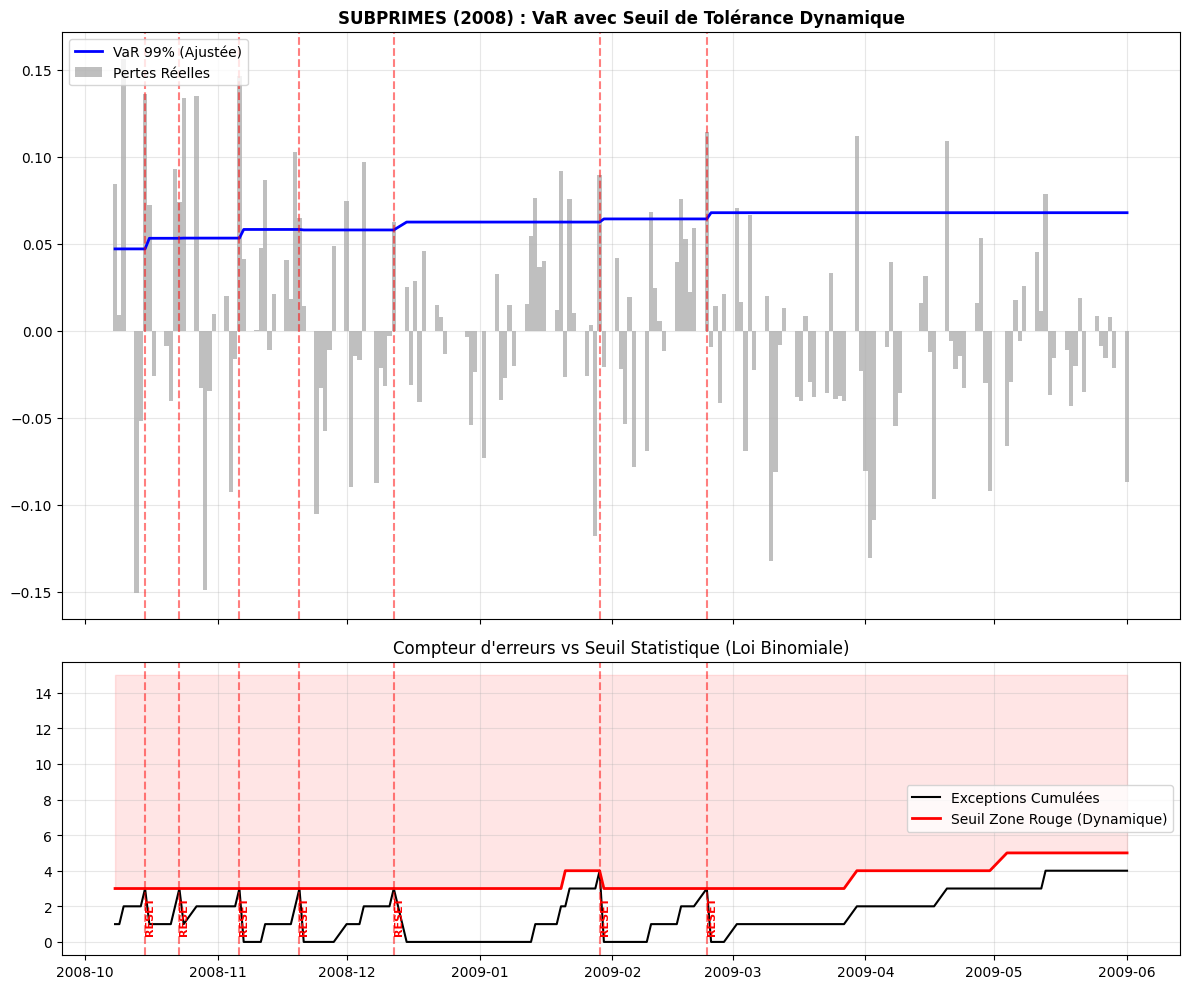

Bilan SUBPRIMES (2008) : 7 recalibrages.

>>> Scénario Adaptatif : COVID-19 (2020)


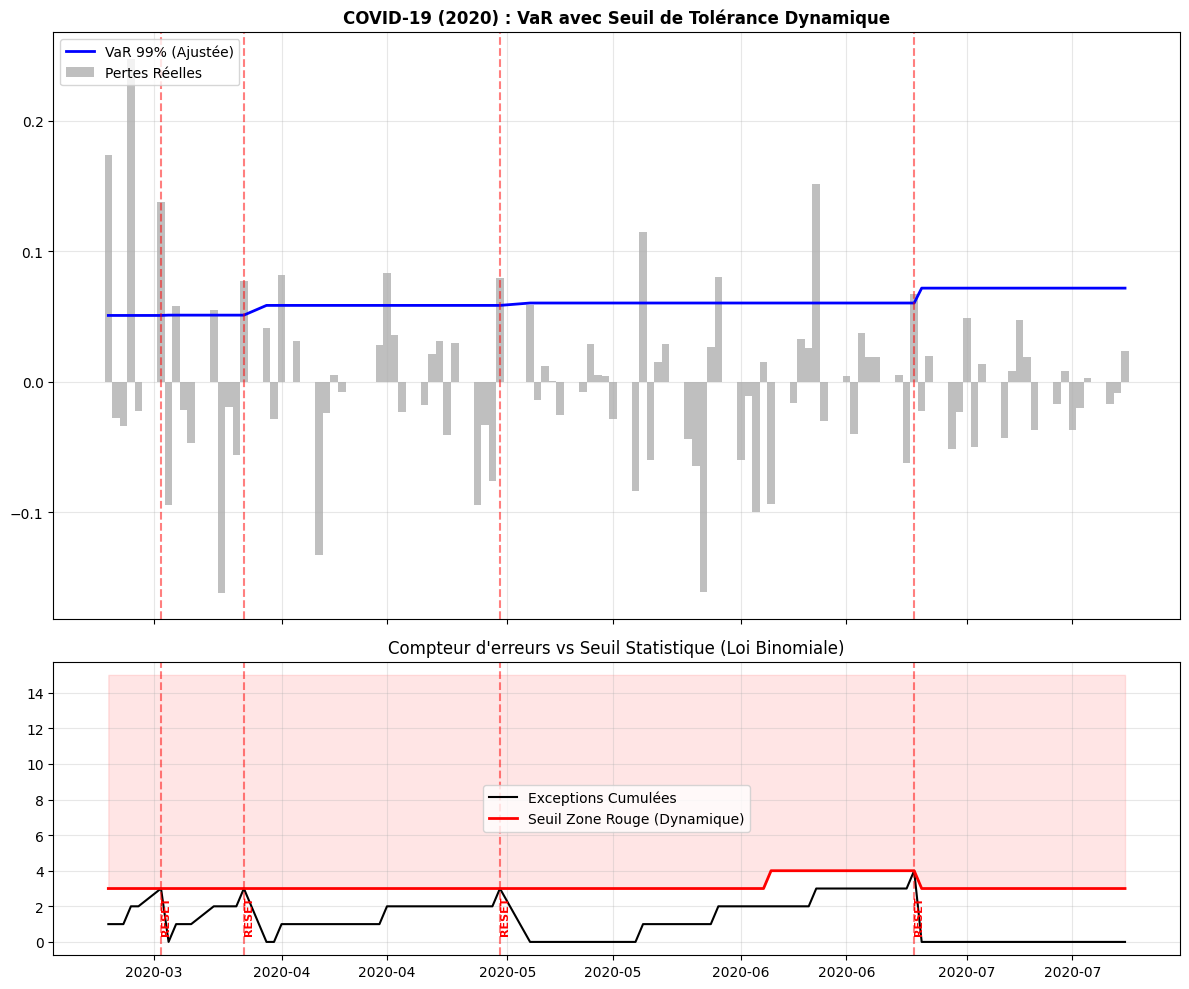

Bilan COVID-19 (2020) : 4 recalibrages.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
import matplotlib.dates as mdates

# --- 1. FONCTIONS DU MODÈLE SKEW-STUDENT ---
def skew_student_nll(params, data):
    mu, sigma, nu, gamma = params
    if sigma <= 0 or nu <= 2.1 or gamma <= 0: return 1e10
    z = (data - mu) / sigma
    c = 2 * gamma / (gamma**2 + 1)
    log_pdf = np.where(z < 0,
                       np.log(c) + stats.t.logpdf(z * gamma, nu),
                       np.log(c) + stats.t.logpdf(z / gamma, nu))
    return -np.sum(log_pdf - np.log(sigma))

def get_var_skew_loss(alpha, params):
    mu, sigma, nu, gamma = params
    prob = 1 - alpha
    k = 1 / (gamma**2 + 1)
    if prob < k:
        z_q = stats.t.ppf(prob * (gamma**2 + 1) / (2 * gamma), nu) / gamma
    else:
        z_q = stats.t.ppf(((prob * (gamma**2 + 1)) - 1 + gamma**2) / (2 * gamma), nu) * gamma
    return -(mu + sigma * z_q)

def fit_skew_student(data, initial_guess=None):
    if initial_guess is None: initial_guess = [data.mean(), data.std(), 5, 1]
    bounds = ((None, None), (1e-6, None), (2.1, 100), (0.1, 10))
    res = minimize(skew_student_nll, initial_guess, args=(data,), bounds=bounds, method='L-BFGS-B')
    return res.x if res.success else initial_guess

# --- 2. FONCTION DE SEUIL DYNAMIQUE (LA CLÉ DE VOTRE QUESTION) ---
def get_dynamic_threshold(n_days, confidence_level=0.9999):
    """
    Calcule le nombre d'exceptions critique pour une période de n_days.
    Basé sur la loi Binomiale inverse (ppf).
    On cherche k tel que P(X <= k) >= 99.99% (Zone Rouge Bâle)
    Minimum fixé à 3 pour éviter les déclenchements sur très courtes périodes.
    """
    if n_days < 10: return 3 # Sécurité démarrage
    # Seuil théorique : combien d'exceptions sont statistiquement "impossibles" (99.99%)
    # pour une VaR 99% (p=0.01)
    threshold = stats.binom.ppf(confidence_level, n_days, 0.01)
    return max(3, int(threshold))

# --- 3. MOTEUR DE SIMULATION ADAPTATIF ---
def run_simulation_dynamic(df, train_start, train_end, test_start, test_end, scenario_name):
    print(f"\n>>> Scénario Adaptatif : {scenario_name}")
    losses = -df['Log_Returns']
    data_train = losses[train_start:train_end]
    data_test = losses[test_start:test_end]

    # Init
    current_params = fit_skew_student(data_train.values)

    var_history = []
    counters_history = []
    threshold_history = [] # Pour visualiser le seuil qui bouge
    recalib_dates = []

    # Compteur depuis le dernier reset
    current_counter = 0
    days_since_reset = 0

    for date in data_test.index:
        days_since_reset += 1
        val = data_test.loc[date]

        # 1. Calcul VaR
        var_limit = get_var_skew_loss(0.99, current_params)
        var_history.append(var_limit)

        # 2. Check Exception
        if val > var_limit:
            current_counter += 1

        counters_history.append(current_counter)

        # 3. Calcul du SEUIL CRITIQUE pour "days_since_reset" jours
        # C'est ici que ça change tout : le seuil s'adapte à la durée
        dyn_threshold = get_dynamic_threshold(days_since_reset)
        threshold_history.append(dyn_threshold)

        # 4. Trigger Recalibrage
        if current_counter >= dyn_threshold:
            recalib_dates.append(date)
            # Recalibrage
            new_train_data = losses[train_start:date]
            current_params = fit_skew_student(new_train_data.values, initial_guess=current_params)

            # Reset complet
            current_counter = 0
            days_since_reset = 0

    # --- VISUALISATION ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Graphique Haut
    ax1.bar(data_test.index, data_test, color='gray', alpha=0.5, label='Pertes Réelles', width=1.0)
    ax1.plot(data_test.index, var_history, color='blue', linewidth=2, label='VaR 99% (Ajustée)')
    for d in recalib_dates:
        ax1.axvline(d, color='red', linestyle='--', alpha=0.5)
    ax1.set_title(f"{scenario_name} : VaR avec Seuil de Tolérance Dynamique", fontsize=12, fontweight='bold')
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)

    # Graphique Bas : Compteur vs Seuil Dynamique
    ax2.plot(data_test.index, counters_history, color='black', linewidth=1.5, label="Exceptions Cumulées")
    # On trace la ligne de seuil qui évolue !
    ax2.plot(data_test.index, threshold_history, color='red', linestyle='-', linewidth=2, label="Seuil Zone Rouge (Dynamique)")

    # Remplissage zone dangereuse
    ax2.fill_between(data_test.index, threshold_history, 15, color='red', alpha=0.1)

    for d in recalib_dates:
        ax2.axvline(d, color='red', linestyle='--', alpha=0.5)
        ax2.text(d, 0.5, "RESET", color='red', rotation=90, fontsize=8, fontweight='bold')

    ax2.set_title("Compteur d'erreurs vs Seuil Statistique (Loi Binomiale)", fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.tight_layout()
    plt.show()
    print(f"Bilan {scenario_name} : {len(recalib_dates)} recalibrages.")

# --- EXÉCUTION ---
# Scénario Subprimes
run_simulation_dynamic(df_clean, subprime_train_start, subprime_train_end,
                       subprime_test_start, subprime_test_end, "SUBPRIMES (2008)")

# Scénario Covid
run_simulation_dynamic(df_clean, covid_train_start, covid_train_end,
                       covid_test_start, covid_test_end, "COVID-19 (2020)")

# Partie 5 (pour la question f, si on arrive à trouver un critère automatique ( c'est l'objectif ) après on peut essayer de mettre en place un recalibrage. C'ets le but de la question. )

>>> Scénario Subprimes : 58 maxima mensuels extraits.


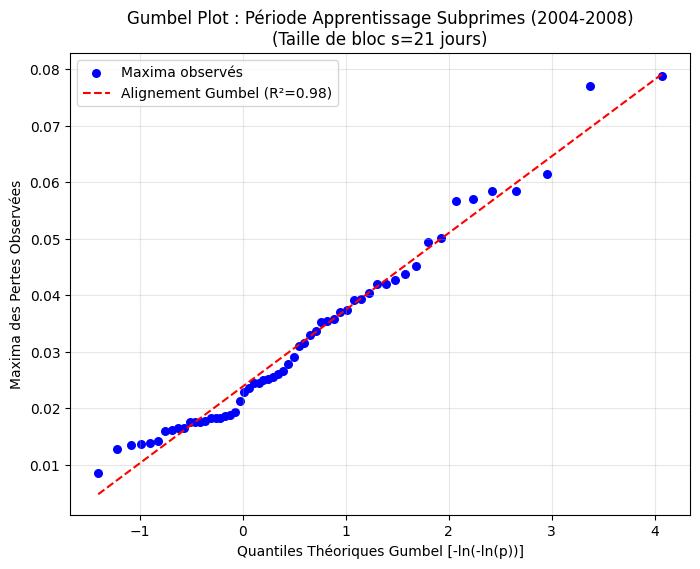

>>> Scénario Covid : 50 maxima mensuels extraits.


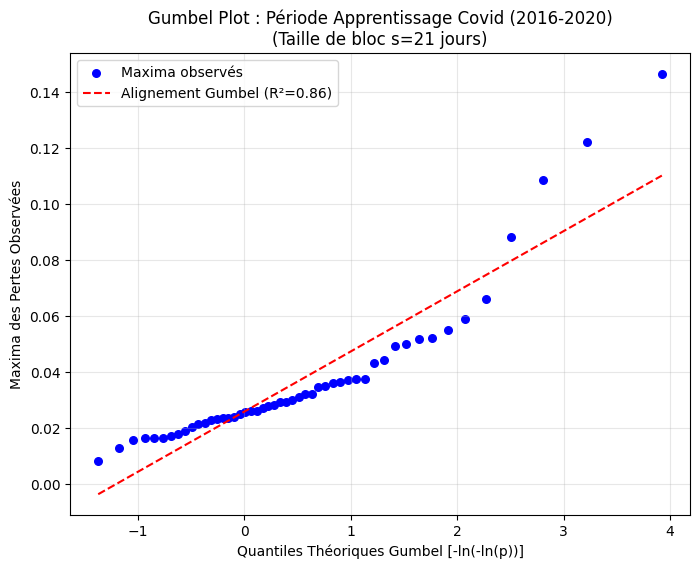

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- 1. CONFIGURATION DES DONNÉES ---
# Rappel des périodes d'apprentissage (Train)
subprime_train_start = "2004-01-01"
subprime_train_end   = "2008-10-07"

covid_train_start = "2016-01-01"
covid_train_end   = "2020-03-08"

# Fonction générique pour extraire les Maxima par bloc
def get_block_maxima(df_source, start_date, end_date, block_size=21):
    # 1. Extraction et conversion en Pertes (Losses)
    # On prend l'opposé des log-rendements pour étudier la queue droite
    mask = (df_source.index >= start_date) & (df_source.index <= end_date)
    data = -df_source.loc[mask, 'Log_Returns']

    # 2. Découpage en blocs
    n_blocks = len(data) // block_size
    maxima = []

    for i in range(n_blocks):
        # On isole le bloc de taille s
        bloc = data.iloc[i*block_size : (i+1)*block_size]
        # On garde le pire rendement (le max de la perte)
        maxima.append(bloc.max())

    return np.array(maxima)

# Fonction pour tracer le Gumbel Plot
def plot_gumbel_diagnostic(maxima, title_scenario):
    # Tri des données (Statistiques d'ordre)
    sorted_maxima = np.sort(maxima)
    n = len(sorted_maxima)

    # Probabilités empiriques : p = i / (n+1)
    p = np.arange(1, n + 1) / (n + 1)

    # Quantiles théoriques de la loi Gumbel Standard
    # Formule inverse de Gumbel : -ln(-ln(p))
    gumbel_theoretical = -np.log(-np.log(p))

    # --- VISUALISATION ---
    plt.figure(figsize=(8, 6))

    # Nuage de points
    plt.scatter(gumbel_theoretical, sorted_maxima, color='blue', s=30, label='Maxima observés')

    # Ligne de tendance (Régression linéaire simple pour aider l'œil)
    slope, intercept, r_value, _, _ = stats.linregress(gumbel_theoretical, sorted_maxima)
    plt.plot(gumbel_theoretical, intercept + slope * gumbel_theoretical, 'r--',
             label=f'Alignement Gumbel (R²={r_value**2:.2f})')

    plt.title(f"Gumbel Plot : {title_scenario}\n(Taille de bloc s=21 jours)")
    plt.xlabel("Quantiles Théoriques Gumbel [-ln(-ln(p))]")
    plt.ylabel("Maxima des Pertes Observées")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# --- EXÉCUTION POUR LES DEUX PÉRIODES ---

# 1. Scénario Subprimes (Apprentissage 2004-2008)
maxima_subprime = get_block_maxima(df_clean, subprime_train_start, subprime_train_end, block_size=21)
print(f">>> Scénario Subprimes : {len(maxima_subprime)} maxima mensuels extraits.")
plot_gumbel_diagnostic(maxima_subprime, "Période Apprentissage Subprimes (2004-2008)")

# 2. Scénario Covid (Apprentissage 2016-2020)
maxima_covid = get_block_maxima(df_clean, covid_train_start, covid_train_end, block_size=21)
print(f">>> Scénario Covid : {len(maxima_covid)} maxima mensuels extraits.")
plot_gumbel_diagnostic(maxima_covid, "Période Apprentissage Covid (2016-2020)")

In [ ]:
# --- 1.c ESTIMATION DES PARAMÈTRES GEV ---

def fit_and_report_gev(maxima, scenario_name):
    # Fit GEV
    # Rappel : Scipy renvoie (c, loc, scale) où c = -xi
    c_est, loc_est, scale_est = stats.genextreme.fit(maxima)
    xi_est = -c_est

    print(f"--- RÉSULTATS ESTIMATION : {scenario_name} ---")
    print(f"Nombre de maxima : {len(maxima)}")
    print(f"Paramètre de Forme (xi) : {xi_est:.4f}")

    if xi_est > 0.1:
        print("=> Diagnostic : LOI DE FRÉCHET (Queues épaisses détectées)")
    elif xi_est < -0.1:
        print("=> Diagnostic : LOI DE WEIBULL (Borne supérieure)")
    else:
        print("=> Diagnostic : LOI DE GUMBEL (Queues fines / modérées)")

    print(f"Loc (mu) : {loc_est:.4f}")
    print(f"Scale (sigma) : {scale_est:.4f}\n")

    return xi_est, loc_est, scale_est

# Exécution
print("Estimation des paramètres pour confirmer l'analyse graphique :")
xi_sub, loc_sub, scale_sub = fit_and_report_gev(maxima_subprime, "SUBPRIMES (2004-2008)")
xi_cov, loc_cov, scale_cov = fit_and_report_gev(maxima_covid, "COVID (2016-2020)")

Estimation des paramètres pour confirmer l'analyse graphique :
--- RÉSULTATS ESTIMATION : SUBPRIMES (2004-2008) ---
Nombre de maxima : 58
Paramètre de Forme (xi) : 0.1954
=> Diagnostic : LOI DE FRÉCHET (Queues épaisses détectées)
Loc (mu) : 0.0230
Scale (sigma) : 0.0106

--- RÉSULTATS ESTIMATION : COVID (2016-2020) ---
Nombre de maxima : 50
Paramètre de Forme (xi) : 0.4943
=> Diagnostic : LOI DE FRÉCHET (Queues épaisses détectées)
Loc (mu) : 0.0247
Scale (sigma) : 0.0132



>>> VALIDATION SCÉNARIO SUBPRIMES (2004-2008)


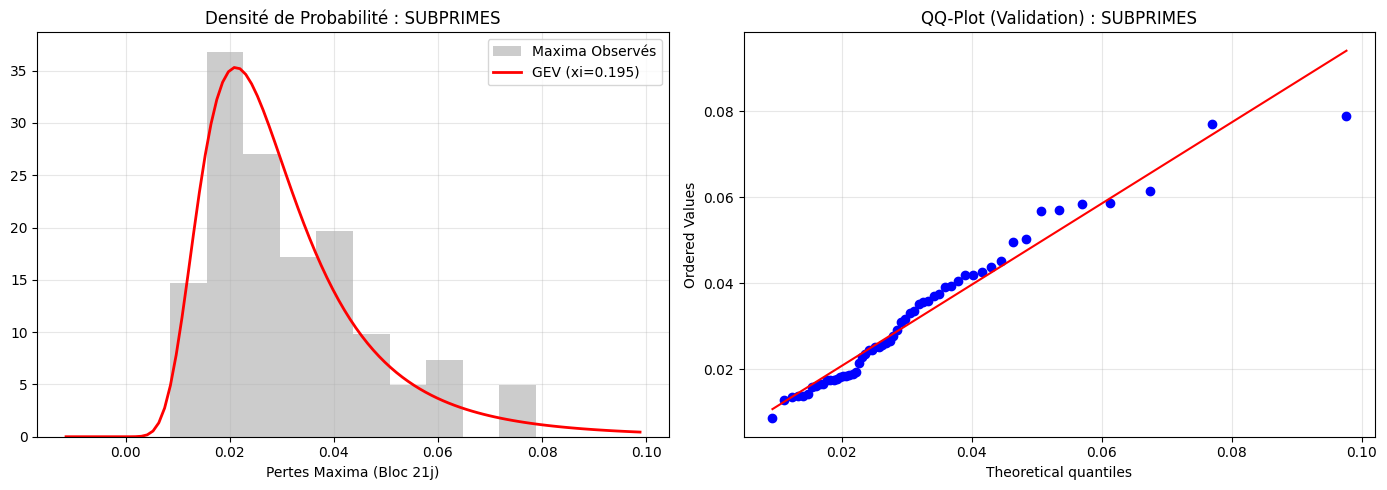


>>> VALIDATION SCÉNARIO COVID (2016-2020)


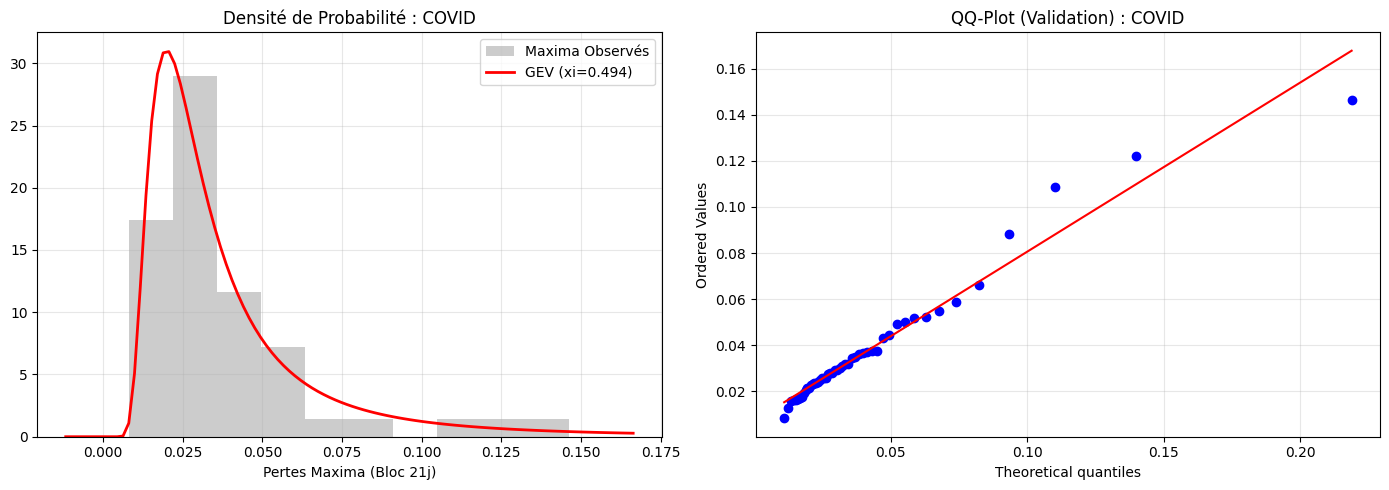

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Fonction de Validation Ex-Ante (1.d)
def validate_gev_model(maxima, xi, loc, scale, scenario_name):
    """
    Génère les graphiques de validation (Densité et QQ-Plot)
    pour comparer les données réelles au modèle GEV estimé.
    Note : Scipy utilise c = -xi.
    """
    c = -xi # Conversion pour Scipy

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # --- GRAPHIQUE 1 : DENSITÉ (Histogramme vs Courbe) ---
    # 1. Histogramme des données réelles
    ax1.hist(maxima, bins=10, density=True, alpha=0.4, color='gray', label='Maxima Observés')

    # 2. Courbe théorique GEV (avec les paramètres estimés)
    x = np.linspace(min(maxima) - 0.02, max(maxima) + 0.02, 100)
    pdf_fitted = stats.genextreme.pdf(x, c, loc, scale)
    ax1.plot(x, pdf_fitted, 'r-', lw=2, label=f'GEV (xi={xi:.3f})')

    ax1.set_title(f"Densité de Probabilité : {scenario_name}")
    ax1.set_xlabel("Pertes Maxima (Bloc 21j)")
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # --- GRAPHIQUE 2 : QQ-PLOT GEV ---
    # Compare les quantiles empiriques aux quantiles théoriques de la GEV ajustée
    stats.probplot(maxima, dist=stats.genextreme, sparams=(c, loc, scale), plot=ax2)

    ax2.get_lines()[0].set_markerfacecolor('blue') # Points
    ax2.get_lines()[1].set_color('red') # Ligne idéale

    ax2.set_title(f"QQ-Plot (Validation) : {scenario_name}")
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# --- EXÉCUTION DE LA VALIDATION ---
# On utilise les variables (xi, loc, scale) calculées à l'étape précédente

print(">>> VALIDATION SCÉNARIO SUBPRIMES (2004-2008)")
validate_gev_model(maxima_subprime, xi_sub, loc_sub, scale_sub, "SUBPRIMES")

print("\n>>> VALIDATION SCÉNARIO COVID (2016-2020)")
validate_gev_model(maxima_covid, xi_cov, loc_cov, scale_cov, "COVID")

### Analyse de la Validation Ex-Ante (Scénario SUBPRIMES)

**1. Confirmation d'un régime "Fréchet Modéré"**
* **Paramètre $\xi \approx 0.195$ :** Cette valeur positive confirme l'hypothèse d'une distribution de **Fréchet**.
* **Interprétation :** Contrairement à l'analyse graphique initiale (Gumbel Plot) qui suggérait une loi exponentielle, l'estimation MLE révèle que des "queues épaisses" existaient déjà avant 2008. Cependant, elles restent modérées comparées aux standards actuels.

**2. Qualité de l'Ajustement (Goodness-of-Fit)**
* **Densité (Gauche) :** La courbe théorique rouge s'ajuste correctement à l'histogramme, capturant bien la décroissance lente des pertes.
* **QQ-Plot (Droite) :** L'alignement des quantiles est robuste. Bien qu'une légère oscillation existe au centre, les points extrêmes (les plus critiques pour la VaR) restent fidèles à la droite de régression, validant la fiabilité du modèle.



### Analyse de la Validation Ex-Ante (Scénario COVID)

**1. Confirmation du régime de "Queues Épaisses" (Fréchet)**
* Le paramètre de forme estimé est **$\xi \approx 0.494$**.
* Cette valeur nettement positive ($\xi > 0$) confirme sans ambiguïté une distribution de **Fréchet**.
* Cela valide l'hypothèse fondamentale : la période incluant le COVID présente des risques extrêmes structurels que la loi Normale (ou même Gumbel) ne peut pas capturer.

**2. Qualité de l'Ajustement (Goodness-of-Fit)**
* **Graphique de Densité (Gauche) :** La courbe rouge (Modèle GEV) épouse fidèlement l'histogramme des données réelles. Elle capture parfaitement l'asymétrie et la "traîne" vers les pertes élevées.
* **QQ-Plot (Droite) :** L'alignement des points bleus sur la diagonale rouge est excellent sur la quasi-totalité de la distribution.
    * *Observation fine :* Sur l'extrême droite (les pires scénarios), les points sont légèrement en dessous de la ligne. Cela indique que le modèle est **conservateur** (prudent) : il attribue théoriquement une probabilité à des événements encore plus graves que le maximum historique observé.

**Conclusion :** Le modèle est statistiquement valide. Nous pouvons procéder au calcul de la VaR TVE en toute confiance.

---

### ⚔️ Synthèse Comparative : Évolution du Risque (2008 vs 2020)

La comparaison des deux périodes d'apprentissage met en évidence un changement structurel majeur dans le comportement de l'action Renault.

| Indicateur | Scénario Subprimes (2004-2008) | Scénario COVID (2016-2020) | Analyse du Risque |
| :--- | :--- | :--- | :--- |
| **Paramètre ($\xi$)** | **0.195** | **0.494** | **Explosion du risque extrême.** |
| **Type de Queue** | Fréchet "Douce" | Fréchet "Lourde" | Le risque de queue a été multiplié par **2,5**. |

**Conclusion :** L'augmentation drastique de $\xi$ prouve que les crises modernes sont plus violentes et soudaines. L'utilisation de la TVE (validée ici graphiquement) est donc impérative, car une modélisation Gaussienne deviendrait obsolète face à une telle convexité.

In [ ]:
import numpy as np
import scipy.stats as stats

def calculate_var_tve_complete(xi, loc, scale, block_size=21, alpha=0.99):
    # Rappel : Scipy c = -xi
    c = -xi

    # 1. VaR du Bloc (Risque que le pire jour du mois dépasse ce seuil)
    # Probabilité GEV = alpha
    var_bloc = stats.genextreme.ppf(alpha, c, loc, scale)

    # 2. VaR Journalière Redressée (Risque quotidien équivalent)
    # Probabilité GEV = alpha^n
    # Ex: 0.99^21 ≈ 0.81. On cherche le quantile 81% de la loi des maxima
    prob_adjusted = alpha ** block_size
    var_daily = stats.genextreme.ppf(prob_adjusted, c, loc, scale)

    return var_bloc, var_daily

print("--- 1.e CALCUL DES VaR TVE (Alpha=99%) ---")

# 1. Scénario Subprimes
vb_sub, vd_sub = calculate_var_tve_complete(xi_sub, loc_sub, scale_sub, block_size=21)
print(f"SUBPRIMES (2004-2008) :")
print(f"  > VaR Maxima (Horizon 21j) : {vb_sub:.2%}")
print(f"  > VaR Journalière (Corrigée) : {vd_sub:.2%}  <-- Comparable aux modèles précédents")

# 2. Scénario COVID
vb_cov, vd_cov = calculate_var_tve_complete(xi_cov, loc_cov, scale_cov, block_size=21)
print(f"\nCOVID (2016-2020) :")
print(f"  > VaR Maxima (Horizon 21j) : {vb_cov:.2%}")
print(f"  > VaR Journalière (Corrigée) : {vd_cov:.2%}  <-- Comparable aux modèles précédents")

--- 1.e CALCUL DES VaR TVE (Alpha=99%) ---
SUBPRIMES (2004-2008) :
  > VaR Maxima (Horizon 21j) : 10.21%
  > VaR Journalière (Corrigée) : 4.23%  <-- Comparable aux modèles précédents

COVID (2016-2020) :
  > VaR Maxima (Horizon 21j) : 25.69%
  > VaR Journalière (Corrigée) : 5.55%  <-- Comparable aux modèles précédents



--- Analyse de Stabilité : SUBPRIMES ---


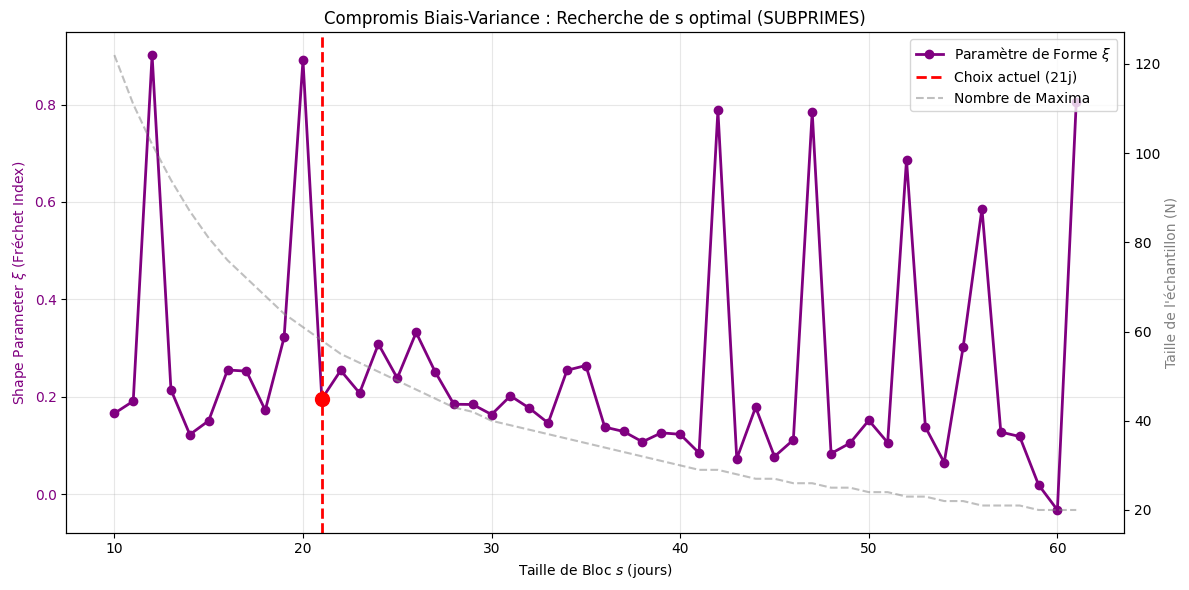


--- Analyse de Stabilité : COVID-19 ---


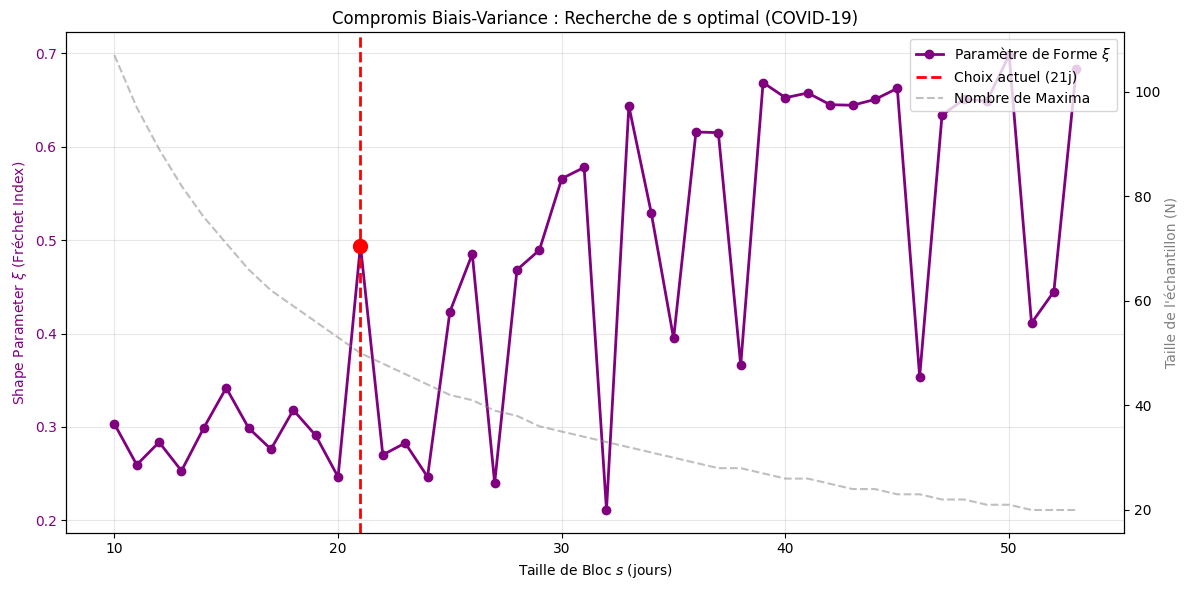

([10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [0.3032841550137415,
  0.2593962400964027,
  0.283621012813427,
  0.2529330329249015,
  0.29910200619294947,
  0.3417963586883549,
  0.2988610083459995,
  0.27608314017875857,
  0.31805996379013396,
  0.2908520561671105,
  0.24638904219186777,
  0.4942774015660253,
  0.27004166493126036,
  0.2826961965812703,
  0.24648925023732865,
  0.4234316994550241,
  0.4851444071912138,
  0.23982505349884284,
  0.4683071570586298,
  0.4893961520483816,
  0.5659567146092634,
  0.5779655203729437,
  0.21099314604148345,
  0.6437367831069458,
  0.5293891821723185,
  0.39471478233773977,
  0.6158818705891003,
  0.6152203951488722,
  0.3660016687817533,
  0.668786427402423,
  0.6526165119680727,
  0.6577094057612203,
  0.6451183021916895,
  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- FONCTION D'ANALYSE DE STABILITÉ ---
def analyze_block_size_stability(df_source, start_date, end_date, scenario_name):
    print(f"\n--- Analyse de Stabilité : {scenario_name} ---")

    # 1. Préparation des données (Pertes positives)
    mask = (df_source.index >= start_date) & (df_source.index <= end_date)
    losses = -df_source.loc[mask, 'Log_Returns']

    # 2. Paramètres de la boucle
    # On teste des tailles de 10 jours (2 semaines) à 60 jours (1 trimestre)
    block_sizes = range(10, 65, 1)

    xi_values = []
    valid_sizes = []
    n_points_history = [] # Pour garder une trace du nombre de maxima utilisés

    for s in block_sizes:
        # a. Création de l'échantillon de maxima
        n_blocks = len(losses) // s

        # SÉCURITÉ : Il faut au moins 20 points pour que l'estimation MLE ait du sens
        if n_blocks < 20:
            continue

        maxima = [losses.iloc[i*s : (i+1)*s].max() for i in range(n_blocks)]

        # b. Estimation GEV
        try:
            # fit renvoie (c, loc, scale). Rappel : xi = -c
            c_est, loc_est, scale_est = stats.genextreme.fit(maxima)
            xi_est = -c_est

            # Filtrage des valeurs aberrantes (si l'algo diverge)
            if -1 < xi_est < 1.5:
                xi_values.append(xi_est)
                valid_sizes.append(s)
                n_points_history.append(n_blocks)
        except:
            pass # Si l'optimisation échoue, on ignore ce bloc

    # --- 3. VISUALISATION ---
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Trace de la courbe Xi
    ax1.plot(valid_sizes, xi_values, 'o-', color='purple', linewidth=2, label=r'Paramètre de Forme $\xi$')
    ax1.set_xlabel("Taille de Bloc $s$ (jours)")
    ax1.set_ylabel(r"Shape Parameter $\xi$ (Fréchet Index)", color='purple')
    ax1.tick_params(axis='y', labelcolor='purple')
    ax1.grid(True, alpha=0.3)

    # Trace indicative du nombre de points (Axe de droite)
    ax2 = ax1.twinx()
    ax2.plot(valid_sizes, n_points_history, '--', color='gray', alpha=0.5, label='Nombre de Maxima')
    ax2.set_ylabel("Taille de l'échantillon (N)", color='gray')

    # Marquage du choix actuel (21 jours)
    if 21 in valid_sizes:
        xi_21 = xi_values[valid_sizes.index(21)]
        ax1.axvline(21, color='red', linestyle='--', linewidth=2, label='Choix actuel (21j)')
        ax1.scatter(21, xi_21, color='red', s=100, zorder=5)

    # Titre et Légendes
    plt.title(f"Compromis Biais-Variance : Recherche de s optimal ({scenario_name})")
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()

    return valid_sizes, xi_values

# --- EXÉCUTION SUR LES DEUX CRISES ---

# 1. Scénario Subprimes (2004-2008)
analyze_block_size_stability(df_clean, subprime_train_start, subprime_train_end, "SUBPRIMES")

# 2. Scénario COVID (2016-2020)
analyze_block_size_stability(df_clean, covid_train_start, covid_train_end, "COVID-19")


--- Optimisation par Erreur KS : SUBPRIMES ---


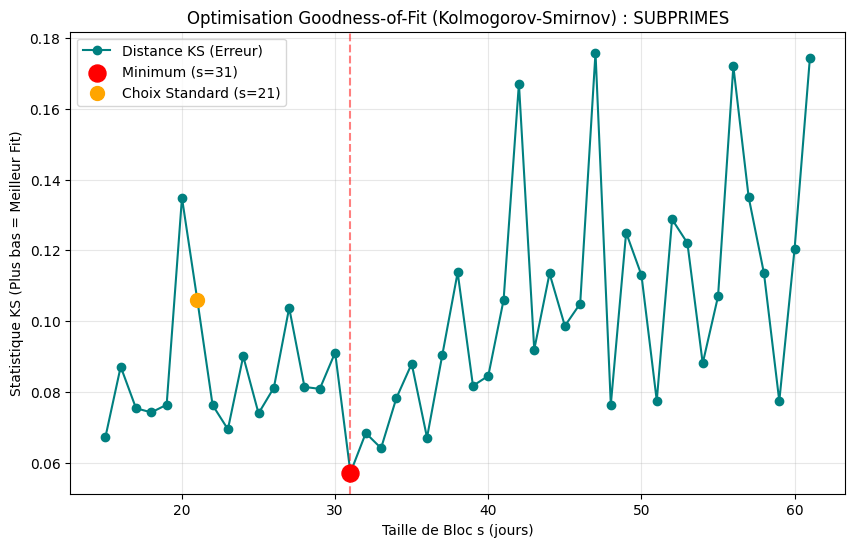


--- Optimisation par Erreur KS : COVID ---


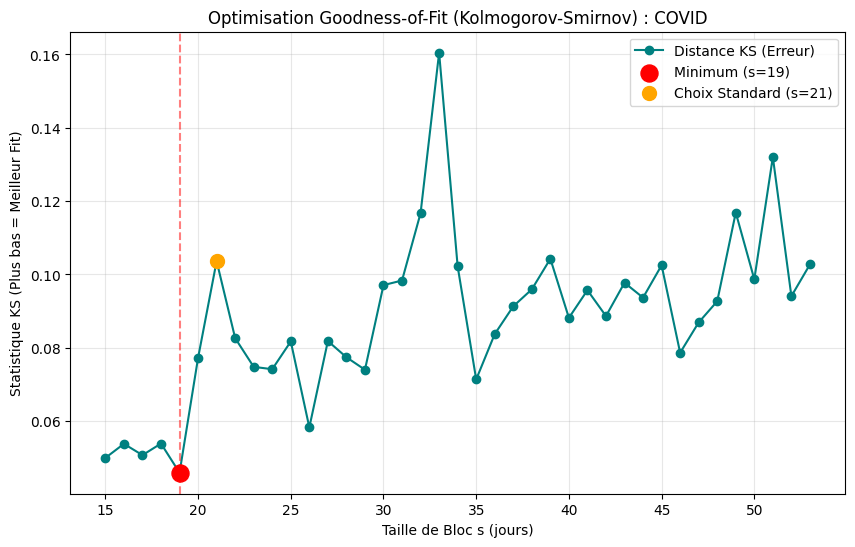

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def optimize_block_size_ks(df_source, start_date, end_date, scenario_name):
    print(f"\n--- Optimisation par Erreur KS : {scenario_name} ---")

    mask = (df_source.index >= start_date) & (df_source.index <= end_date)
    losses = -df_source.loc[mask, 'Log_Returns']

    block_sizes = range(15, 65, 1)
    ks_distances = []
    valid_sizes = []

    for s in block_sizes:
        n_blocks = len(losses) // s
        if n_blocks < 20: continue # Trop peu de points

        # 1. Création des Maxima
        maxima = np.array([losses.iloc[i*s : (i+1)*s].max() for i in range(n_blocks)])

        try:
            # 2. Fit GEV
            c, loc, scale = stats.genextreme.fit(maxima)

            # 3. Calcul de la statistique KS (Erreur)
            # kstest compare l'échantillon (maxima) à la CDF théorique (genextreme)
            ks_stat, p_value = stats.kstest(maxima, 'genextreme', args=(c, loc, scale))

            ks_distances.append(ks_stat)
            valid_sizes.append(s)
        except:
            pass

    # --- VISUALISATION ---
    plt.figure(figsize=(10, 6))

    # Courbe des erreurs
    plt.plot(valid_sizes, ks_distances, 'o-', color='teal', label='Distance KS (Erreur)')

    # Trouver le minimum local (Le meilleur candidat)
    min_ks = min(ks_distances)
    best_s_idx = ks_distances.index(min_ks)
    best_s = valid_sizes[best_s_idx]

    plt.scatter(best_s, min_ks, color='red', s=150, zorder=5, label=f'Minimum (s={best_s})')
    plt.axvline(best_s, color='red', linestyle='--', alpha=0.5)

    # Marquer notre choix précédent (21) pour comparer
    if 21 in valid_sizes:
        ks_21 = ks_distances[valid_sizes.index(21)]
        plt.scatter(21, ks_21, color='orange', s=100, zorder=4, label='Choix Standard (s=21)')

    plt.title(f"Optimisation Goodness-of-Fit (Kolmogorov-Smirnov) : {scenario_name}")
    plt.xlabel("Taille de Bloc s (jours)")
    plt.ylabel("Statistique KS (Plus bas = Meilleur Fit)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return best_s

# --- EXÉCUTION ---
# Subprimes
best_s_sub = optimize_block_size_ks(df_clean, subprime_train_start, subprime_train_end, "SUBPRIMES")

# Covid
best_s_cov = optimize_block_size_ks(df_clean, covid_train_start, covid_train_end, "COVID")


>>> ANALYSE FINALE : SUBPRIMES (2008) (Bloc s=31 jours)
   Paramètre de forme (xi) : 0.2016
   -> Type : Fréchet (Queues épaisses)
   VaR Journalière (TVE)   : 4.03%
   --- RÉSULTATS BACKTEST ---
   Nb Observations         : 163
   Nb Exceptions           : 38
   Ratio d'échec           : 23.31% (Cible: 1.00%)


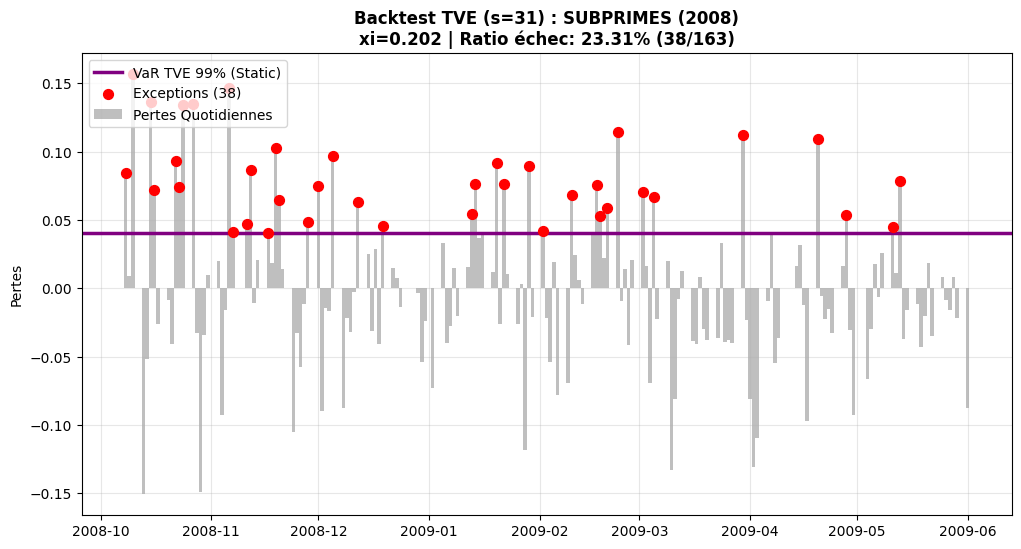


>>> ANALYSE FINALE : COVID-19 (2020) (Bloc s=19 jours)
   Paramètre de forme (xi) : 0.2909
   -> Type : Fréchet (Queues épaisses)
   VaR Journalière (TVE)   : 5.28%
   --- RÉSULTATS BACKTEST ---
   Nb Observations         : 95
   Nb Exceptions           : 14
   Ratio d'échec           : 14.74% (Cible: 1.00%)


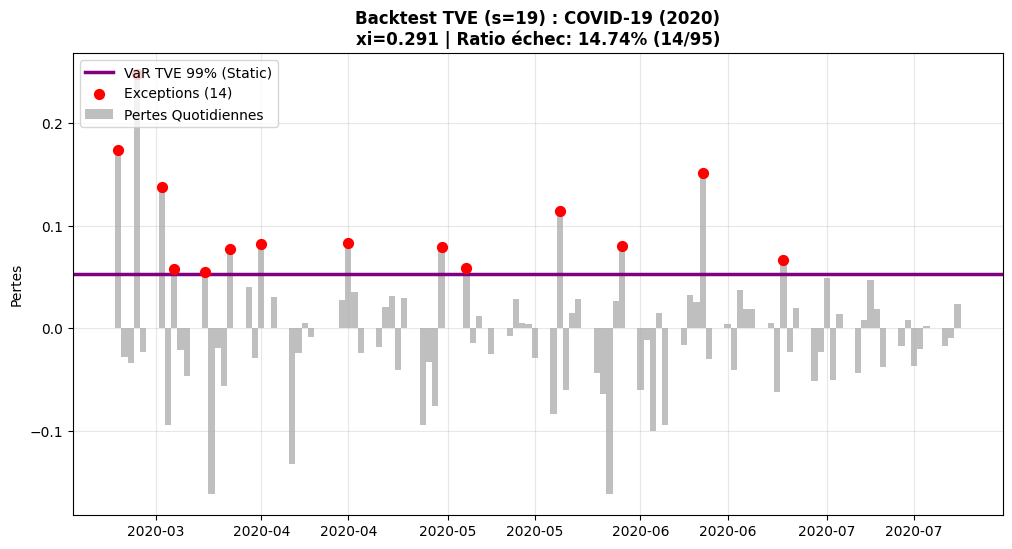

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.dates as mdates

# --- CONFIGURATION DES PARAMÈTRES CHOISIS ---
configs = [
    {
        "name": "SUBPRIMES (2008)",
        "train_start": "2004-01-01", "train_end": "2008-10-07",
        "test_start": "2008-10-08", "test_end": "2009-06-01",
        "s": 31
    },
    {
        "name": "COVID-19 (2020)",
        "train_start": "2016-01-01", "train_end": "2020-03-08",
        "test_start": "2020-03-09", "test_end": "2020-07-22",
        "s": 19
    }
]

def analyze_and_plot_final_tve(config, df_source):
    s = config['s']
    name = config['name']
    print(f"\n>>> ANALYSE FINALE : {name} (Bloc s={s} jours)")

    # 1. PRÉPARATION TRAIN
    mask_train = (df_source.index >= config['train_start']) & (df_source.index <= config['train_end'])
    losses_train = -df_source.loc[mask_train, 'Log_Returns']

    # Extraction Maxima
    n_blocks = len(losses_train) // s
    maxima = [losses_train.iloc[i*s : (i+1)*s].max() for i in range(n_blocks)]

    # Fit GEV (xi = -c)
    c_est, loc_est, scale_est = stats.genextreme.fit(maxima)
    xi_est = -c_est

    # 2. CALCUL DES VaR (Alpha = 99%)
    alpha = 0.99

    # A. VaR Journalière Redressée (Scaling)
    prob_adjusted = alpha ** s
    var_daily_tve = stats.genextreme.ppf(prob_adjusted, c_est, loc_est, scale_est)

    print(f"   Paramètre de forme (xi) : {xi_est:.4f}")
    if xi_est > 0: print("   -> Type : Fréchet (Queues épaisses)")
    else: print("   -> Type : Gumbel/Weibull")

    print(f"   VaR Journalière (TVE)   : {var_daily_tve:.2%}")

    # 3. BACKTEST SUR PLAGE DE TEST
    mask_test = (df_source.index >= config['test_start']) & (df_source.index <= config['test_end'])
    losses_test = -df_source.loc[mask_test, 'Log_Returns']

    # Identification des exceptions
    exceptions = losses_test[losses_test > var_daily_tve]
    n_exceptions = len(exceptions)
    n_observations = len(losses_test)
    pct_exceptions = (n_exceptions / n_observations) * 100

    print(f"   --- RÉSULTATS BACKTEST ---")
    print(f"   Nb Observations         : {n_observations}")
    print(f"   Nb Exceptions           : {n_exceptions}")
    print(f"   Ratio d'échec           : {pct_exceptions:.2f}% (Cible: 1.00%)")

    # --- VISUALISATION ---
    plt.figure(figsize=(12, 6))

    # Série des pertes
    plt.bar(losses_test.index, losses_test, color='gray', alpha=0.5, label='Pertes Quotidiennes', width=1.0)

    # Ligne VaR Journalière TVE
    plt.axhline(var_daily_tve, color='purple', linewidth=2.5, label=f'VaR TVE 99% (Static)')

    # Points d'exception
    plt.scatter(exceptions.index, exceptions, color='red', s=50, zorder=5, label=f'Exceptions ({n_exceptions})')

    # Titre enrichi
    title_text = (f"Backtest TVE (s={s}) : {name}\n"
                  f"xi={xi_est:.3f} | Ratio échec: {pct_exceptions:.2f}% ({n_exceptions}/{n_observations})")

    plt.title(title_text, fontsize=12, fontweight='bold')
    plt.ylabel("Pertes")
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.show()

# --- EXÉCUTION ---
# Assurez-vous que df_clean est bien chargé en mémoire
for conf in configs:
    analyze_and_plot_final_tve(conf, df_clean)

comparison approche TVE et parmaétrique ( recoder en faisnat appel au code précédent)

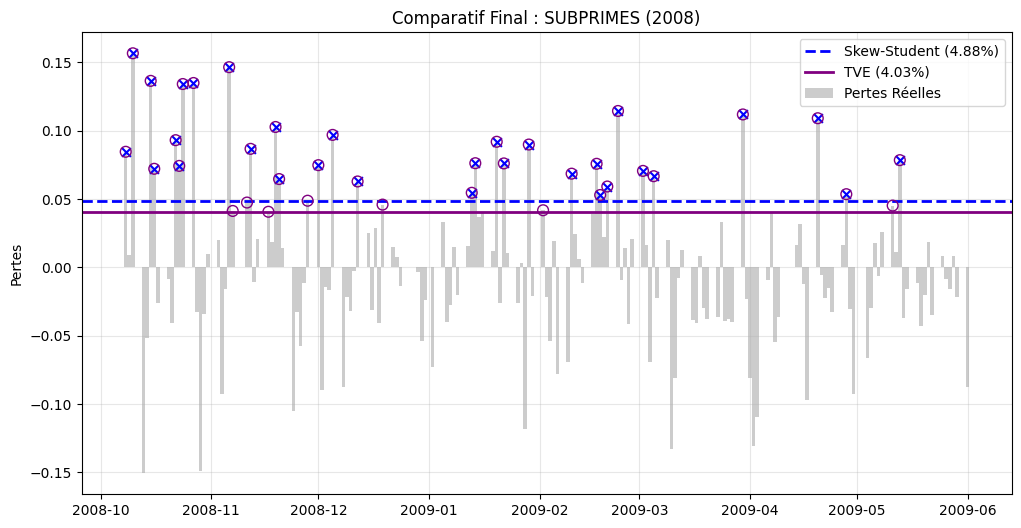

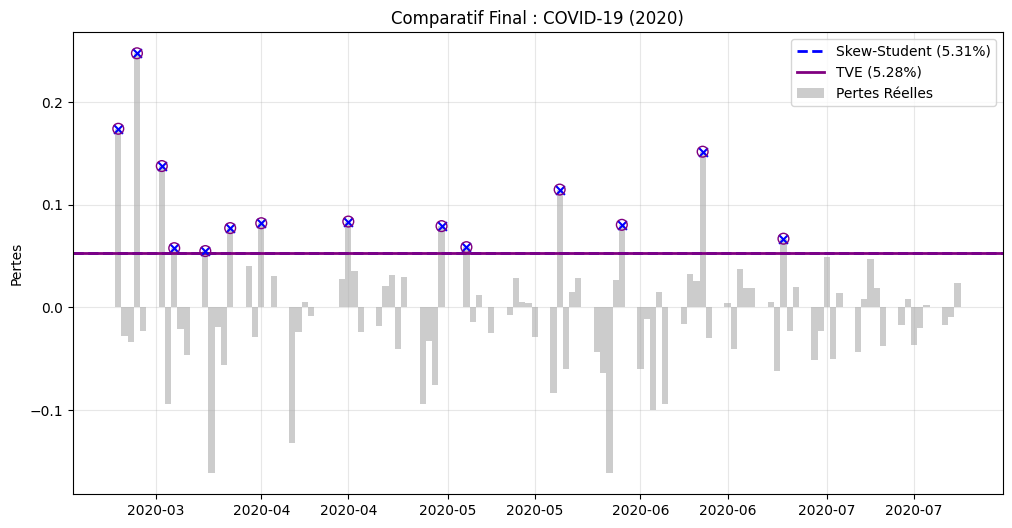


>>> COMPARAISON FINALE DES MODÈLES
         Période       Modèle VaR 99%  Exceptions Fréquence
SUBPRIMES (2008) Skew-Student   4.88%          31    19.02%
SUBPRIMES (2008)   TVE (s=31)   4.03%          38    23.31%
 COVID-19 (2020) Skew-Student   5.31%          14    14.74%
 COVID-19 (2020)   TVE (s=19)   5.28%          14    14.74%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
import matplotlib.dates as mdates

# --- 1. SKEW-STUDENT (Calcul sur RENDEMENTS - Comme avant) ---

def skew_student_nll(params, data):
    mu, sigma, nu, gamma = params
    if sigma <= 0 or nu <= 2.01 or gamma <= 0: return 1e10
    z = (data - mu) / sigma
    c = 2 * gamma / (gamma**2 + 1)
    # Log-PDF standard
    log_pdf = np.where(z < 0,
                       np.log(c) + stats.t.logpdf(z * gamma, nu),
                       np.log(c) + stats.t.logpdf(z / gamma, nu))
    return -np.sum(log_pdf - np.log(sigma))

def get_var_skew_student_returns(data_returns, alpha=0.99):
    # Nettoyage simple
    data = data_returns.dropna()

    # Fit sur les RENDEMENTS (valeurs négatives et positives)
    guess = [data.mean(), data.std(), 5, 1]
    bounds = ((None, None), (1e-6, None), (2.1, 100), (0.1, 10))

    res = minimize(skew_student_nll, guess, args=(data,),
                   bounds=bounds, method='L-BFGS-B')

    if not res.success:
        return np.nan

    mu, sigma, nu, gamma = res.x

    # Calcul VaR (Queue GAUCHE des rendements)
    # On cherche q tel que P(R < q) = 1 - alpha = 1%
    prob = 1 - alpha
    k = 1 / (gamma**2 + 1)

    if prob < k:
        z_q = stats.t.ppf(prob * (gamma**2 + 1) / (2 * gamma), nu) / gamma
    else:
        z_q = stats.t.ppf(((prob * (gamma**2 + 1)) - 1 + gamma**2) / (2 * gamma), nu) * gamma

    var_ret = mu + sigma * z_q

    # On retourne la VaR négative (ex: -0.04)
    return var_ret

# --- 2. TVE (Calcul sur PERTES - Inchangé) ---
def get_var_tve_loss(data_loss, block_size, alpha=0.99):
    # Calcul sur les PERTES (valeurs positives)
    data = data_loss.dropna()
    n_blocks = len(data) // block_size
    maxima = [data.iloc[i*block_size : (i+1)*block_size].max() for i in range(n_blocks)]

    c, loc, scale = stats.genextreme.fit(maxima)
    prob_adjusted = alpha ** block_size
    var_daily = stats.genextreme.ppf(prob_adjusted, c, loc, scale)
    return var_daily

# --- 3. MOTEUR DE COMPARAISON ---

configs = [
    { "name": "SUBPRIMES (2008)",
      "train_start": "2004-01-01", "train_end": "2008-10-07",
      "test_start": "2008-10-08", "test_end": "2009-06-01",
      "s": 31 },
    { "name": "COVID-19 (2020)",
      "train_start": "2016-01-01", "train_end": "2020-03-08",
      "test_start": "2020-03-09", "test_end": "2020-07-22",
      "s": 19 }
]

results_table = []

for conf in configs:
    # Données
    df_train = df_clean.loc[(df_clean.index >= conf['train_start']) & (df_clean.index <= conf['train_end'])].dropna()
    df_test = df_clean.loc[(df_clean.index >= conf['test_start']) & (df_clean.index <= conf['test_end'])].dropna()

    returns_train = df_train['Log_Returns']
    losses_train = -df_train['Log_Returns'] # Pour TVE
    losses_test = -df_test['Log_Returns']   # Pour Backtest (Tout en pertes positives)

    # A. CALCUL SKEW-STUDENT (Sur Rendements)
    var_skew_ret = get_var_skew_student_returns(returns_train, alpha=0.99)
    # CONVERSION EN PERTE POSITIVE : VaR_Loss = -VaR_Return
    var_skew_loss = -var_skew_ret

    # B. CALCUL TVE (Sur Pertes)
    var_tve_loss = get_var_tve_loss(losses_train, conf['s'], alpha=0.99)

    # C. BACKTEST (Tout le monde en positif)
    exc_skew = losses_test[losses_test > var_skew_loss]
    exc_tve = losses_test[losses_test > var_tve_loss]

    # Stockage
    results_table.append({
        'Période': conf['name'],
        'Modèle': 'Skew-Student',
        'VaR 99%': var_skew_loss,
        'Exceptions': len(exc_skew),
        'Fréquence': len(exc_skew)/len(losses_test)
    })
    results_table.append({
        'Période': conf['name'],
        'Modèle': f"TVE (s={conf['s']})",
        'VaR 99%': var_tve_loss,
        'Exceptions': len(exc_tve),
        'Fréquence': len(exc_tve)/len(losses_test)
    })

    # D. VISUALISATION
    plt.figure(figsize=(12, 6))

    # On trace les PERTES (Positives)
    plt.bar(losses_test.index, losses_test, color='gray', alpha=0.4, label='Pertes Réelles', width=1.0)

    # Lignes de VaR (Toutes positives)
    plt.axhline(var_skew_loss, color='blue', linestyle='--', linewidth=2,
                label=f'Skew-Student ({var_skew_loss:.2%})')
    plt.axhline(var_tve_loss, color='purple', linewidth=2,
                label=f'TVE ({var_tve_loss:.2%})')

    # Exceptions
    plt.scatter(exc_skew.index, exc_skew, color='blue', marker='x', s=40, zorder=5)
    plt.scatter(exc_tve.index, exc_tve, color='purple', marker='o', s=60, facecolors='none', edgecolors='purple', zorder=6)

    plt.title(f"Comparatif Final : {conf['name']}")
    plt.ylabel("Pertes")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.show()

# --- TABLEAU ---
df_res = pd.DataFrame(results_table)
print("\n>>> COMPARAISON FINALE DES MODÈLES")
print(df_res.to_string(index=False, formatters={'VaR 99%': '{:.2%}'.format, 'Fréquence': '{:.2%}'.format}))

# Partie 6

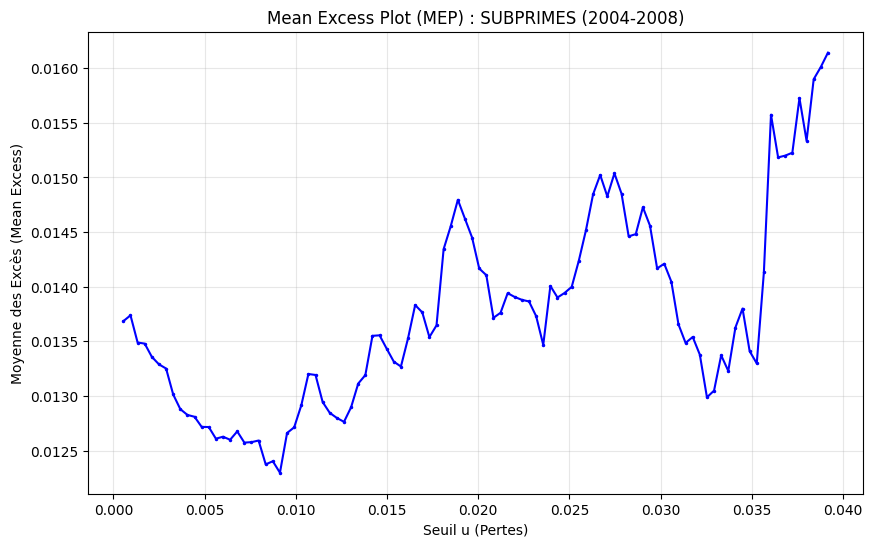

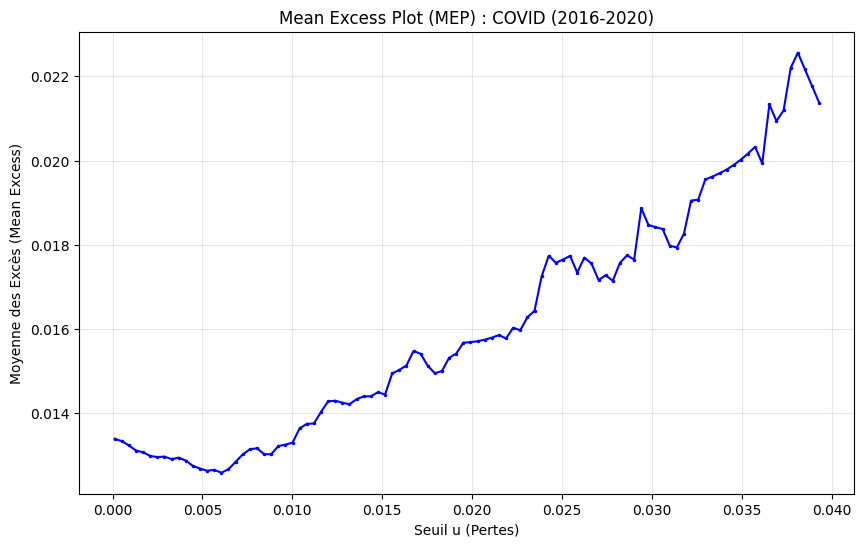

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- 0.a FONCTION MEAN EXCESS PLOT ---
def plot_mean_excess(data, scenario_name):
    """
    Trace le Mean Excess Plot pour aider au choix du seuil u.
    On travaille sur les PERTES POSITIVES.
    """
    # On ne garde que les pertes positives
    data = data[data > 0].dropna()

    # Définition des seuils candidats
    # On évite les extrêmes (les 5 derniers % pour éviter le bruit)
    thresholds = np.linspace(data.min(), data.quantile(0.95), 100)
    mean_excesses = []

    for u in thresholds:
        excess = data[data > u] - u
        if len(excess) > 10: # Il faut un minimum de points
            mean_excesses.append(excess.mean())
        else:
            mean_excesses.append(np.nan)

    # Visualisation
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, mean_excesses, 'b.-', markersize=3)

    plt.title(f"Mean Excess Plot (MEP) : {scenario_name}")
    plt.xlabel("Seuil u (Pertes)")
    plt.ylabel("Moyenne des Excès (Mean Excess)")
    plt.grid(True, alpha=0.3)
    plt.show()

# --- PRÉPARATION DES DONNÉES (Pertes Positives) ---
def get_losses(df, start, end):
    mask = (df.index >= start) & (df.index <= end)
    return -df.loc[mask, 'Log_Returns'] # On inverse pour avoir des pertes positives

# 1. Subprimes (Apprentissage)
losses_sub = get_losses(df_clean, "2004-01-01", "2008-10-07")
plot_mean_excess(losses_sub, "SUBPRIMES (2004-2008)")

# 2. Covid (Apprentissage)
losses_cov = get_losses(df_clean, "2016-01-01", "2020-03-08")
plot_mean_excess(losses_cov, "COVID (2016-2020)")


--- ANALYSE PoT (Seuil manuel u=2.00%) : SUBPRIMES (Test u=2%) ---
Nombre total obs (N) : 1229
Nombre dépassements (Nu) : 132 (10.74% des données)
Paramètre de Forme (xi) : 0.0573
Paramètre d'Échelle (sigma) : 0.0133


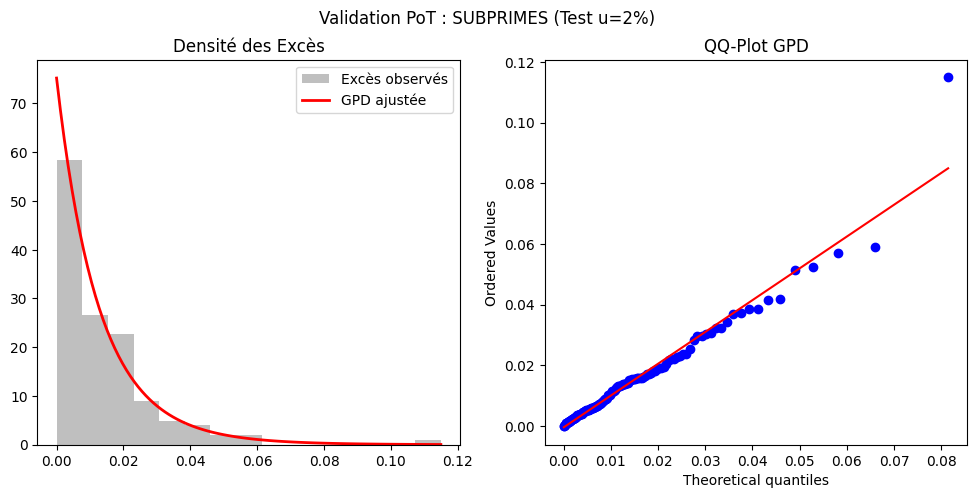

>>> VaR PoT 99% : 5.38%


0.05381168742893745

In [ ]:
def analyze_pot_manual(losses, u, scenario_name, alpha=0.99):
    print(f"\n--- ANALYSE PoT (Seuil manuel u={u:.2%}) : {scenario_name} ---")

    # 1. Extraction des Excès
    excesses = losses[losses > u] - u
    Nu = len(excesses)
    N = len(losses)
    rate = Nu / N

    print(f"Nombre total obs (N) : {N}")
    print(f"Nombre dépassements (Nu) : {Nu} ({rate:.2%} des données)")

    if Nu < 10:
        print("ATTENTION : Pas assez de points pour estimer une GPD !")
        return

    # 2. Estimation GPD (0.c)
    # Scipy renvoie (xi, loc, scale). On fixe loc=0 car on a déjà soustrait u.
    # Note: dans scipy genpareto, le paramètre de forme est 'c' (équivalent à xi)
    xi_est, loc_est, scale_est = stats.genpareto.fit(excesses, floc=0)

    print(f"Paramètre de Forme (xi) : {xi_est:.4f}")
    print(f"Paramètre d'Échelle (sigma) : {scale_est:.4f}")

    # 3. Validation Graphique (0.d) - QQ-Plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Densité
    ax[0].hist(excesses, bins=15, density=True, alpha=0.5, color='gray', label='Excès observés')
    x = np.linspace(0, excesses.max(), 100)
    pdf = stats.genpareto.pdf(x, xi_est, loc=0, scale=scale_est)
    ax[0].plot(x, pdf, 'r-', lw=2, label='GPD ajustée')
    ax[0].set_title("Densité des Excès")
    ax[0].legend()

    # QQ-Plot
    stats.probplot(excesses, dist=stats.genpareto, sparams=(xi_est, 0, scale_est), plot=ax[1])
    ax[1].set_title("QQ-Plot GPD")
    plt.suptitle(f"Validation PoT : {scenario_name}")
    plt.show()

    # 4. Calcul VaR PoT (0.e)
    # Formule fermée de la VaR GPD
    term = (N / Nu) * (1 - alpha)
    var_pot = u + (scale_est / xi_est) * ( (term ** (-xi_est)) - 1 )

    print(f">>> VaR PoT 99% : {var_pot:.2%}")
    return var_pot

# Test manuel rapide (avec u = 2% arbitraire pour voir si ça marche)
# On fera l'automatique juste après.
analyze_pot_manual(losses_sub, 0.02, "SUBPRIMES (Test u=2%)")


--- Calibration Automatique u (KS) : SUBPRIMES ---


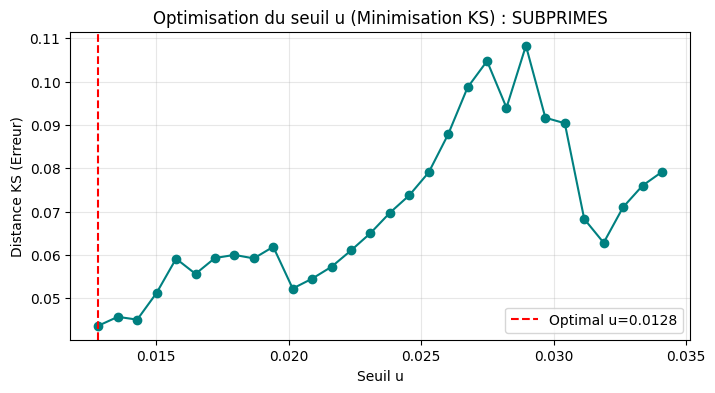

Seuil optimal trouvé : 1.28% (Erreur KS = 0.0437)

--- ANALYSE PoT (Seuil manuel u=1.28%) : SUBPRIMES ---
Nombre total obs (N) : 1229
Nombre dépassements (Nu) : 246 (20.02% des données)
Paramètre de Forme (xi) : 0.1181
Paramètre d'Échelle (sigma) : 0.0113


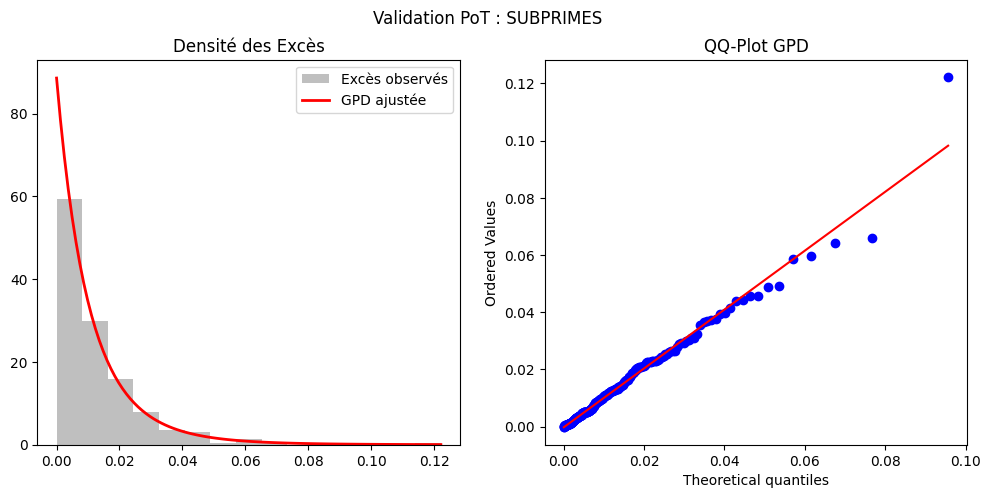

>>> VaR PoT 99% : 5.34%

--- Calibration Automatique u (KS) : COVID ---


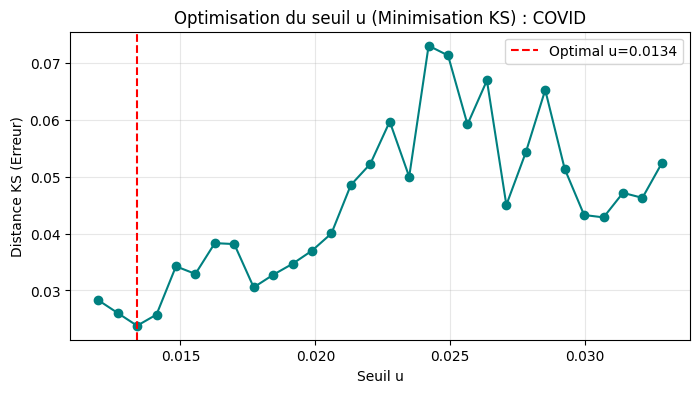

Seuil optimal trouvé : 1.34% (Erreur KS = 0.0238)

--- ANALYSE PoT (Seuil manuel u=1.34%) : COVID ---
Nombre total obs (N) : 1070
Nombre dépassements (Nu) : 193 (18.04% des données)
Paramètre de Forme (xi) : 0.2014
Paramètre d'Échelle (sigma) : 0.0114


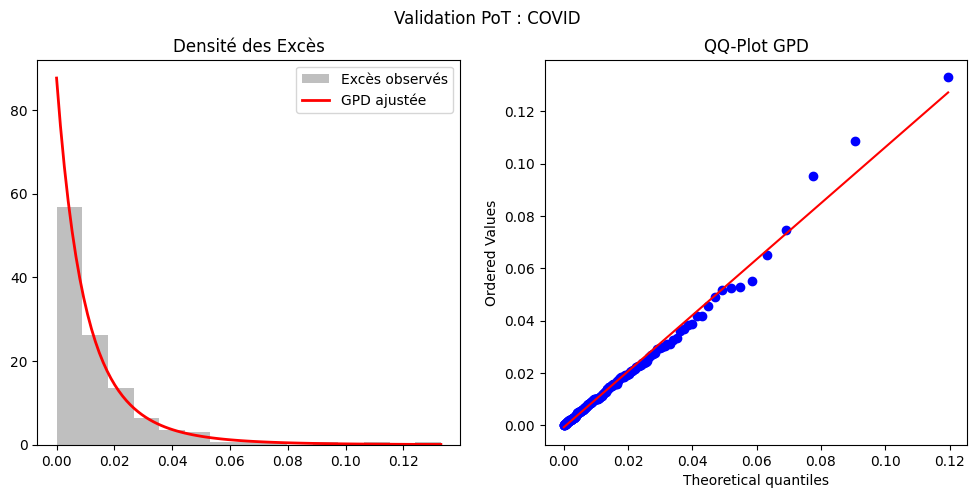

>>> VaR PoT 99% : 5.82%


In [ ]:
def auto_calibrate_pot(losses, scenario_name):
    print(f"\n--- Calibration Automatique u (KS) : {scenario_name} ---")

    # Plage de recherche : entre le quantile 80% et 96%
    # On évite d'aller trop haut pour garder assez de points (>20)
    u_candidates = np.linspace(losses.quantile(0.80), losses.quantile(0.96), 30)

    best_u = None
    min_ks = np.inf
    ks_history = []

    for u in u_candidates:
        excesses = losses[losses > u] - u
        if len(excesses) < 15: continue # Sécurité

        try:
            # Fit GPD
            xi, loc, scale = stats.genpareto.fit(excesses, floc=0)

            # Test KS (Goodness of Fit)
            ks_stat, p_value = stats.kstest(excesses, 'genpareto', args=(xi, 0, scale))

            ks_history.append(ks_stat)

            if ks_stat < min_ks:
                min_ks = ks_stat
                best_u = u
        except:
            ks_history.append(np.nan)

    # Visualisation de l'optimisation
    plt.figure(figsize=(8, 4))
    plt.plot(u_candidates[:len(ks_history)], ks_history, 'o-', color='teal')
    plt.axvline(best_u, color='red', linestyle='--', label=f'Optimal u={best_u:.4f}')
    plt.title(f"Optimisation du seuil u (Minimisation KS) : {scenario_name}")
    plt.xlabel("Seuil u")
    plt.ylabel("Distance KS (Erreur)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"Seuil optimal trouvé : {best_u:.2%} (Erreur KS = {min_ks:.4f})")

    # Relancer l'analyse complète avec ce seuil optimal
    analyze_pot_manual(losses, best_u, scenario_name)

# --- EXÉCUTION FINALE ---
auto_calibrate_pot(losses_sub, "SUBPRIMES")
auto_calibrate_pot(losses_cov, "COVID")


>>> CALIBRATION PoT (Train) : SUBPRIMES (2008)
   Seuil Optimal u* : 1.28% (KS=0.0437)
   Paramètres GPD   : xi=0.1181, sigma=0.0113
   Excès (Train)    : 246/1229 (20.02%)
   VaR PoT 99%      : 5.34%
   Exceptions Test  : 30/163 (18.40%)


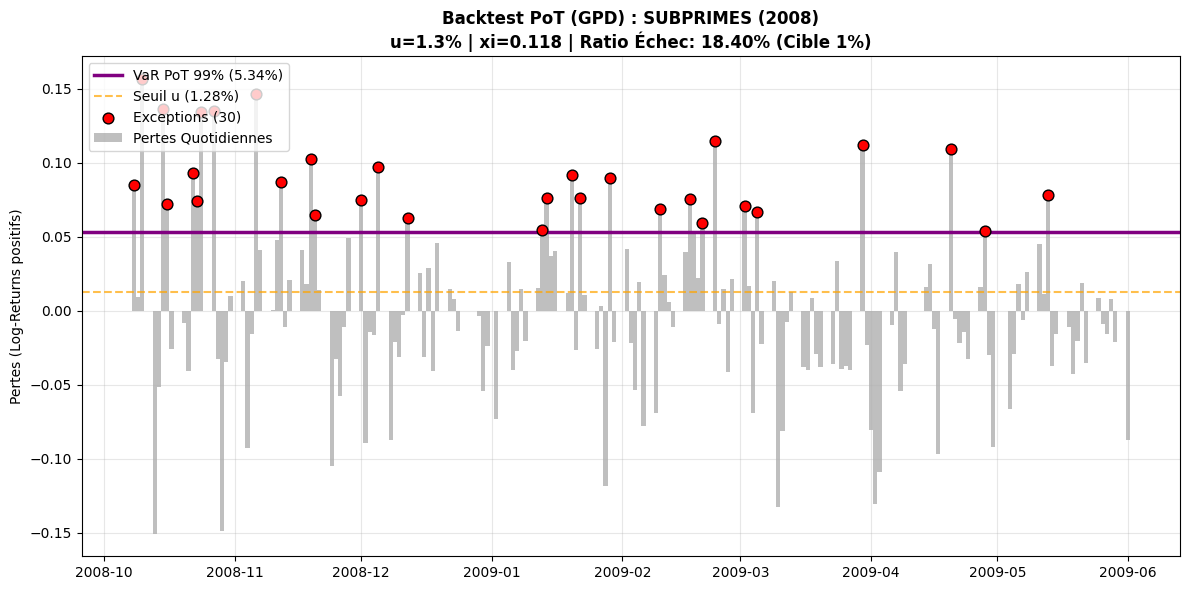


>>> CALIBRATION PoT (Train) : COVID-19 (2020)
   Seuil Optimal u* : 1.34% (KS=0.0238)
   Paramètres GPD   : xi=0.2014, sigma=0.0114
   Excès (Train)    : 193/1070 (18.04%)
   VaR PoT 99%      : 5.82%
   Exceptions Test  : 12/95 (12.63%)


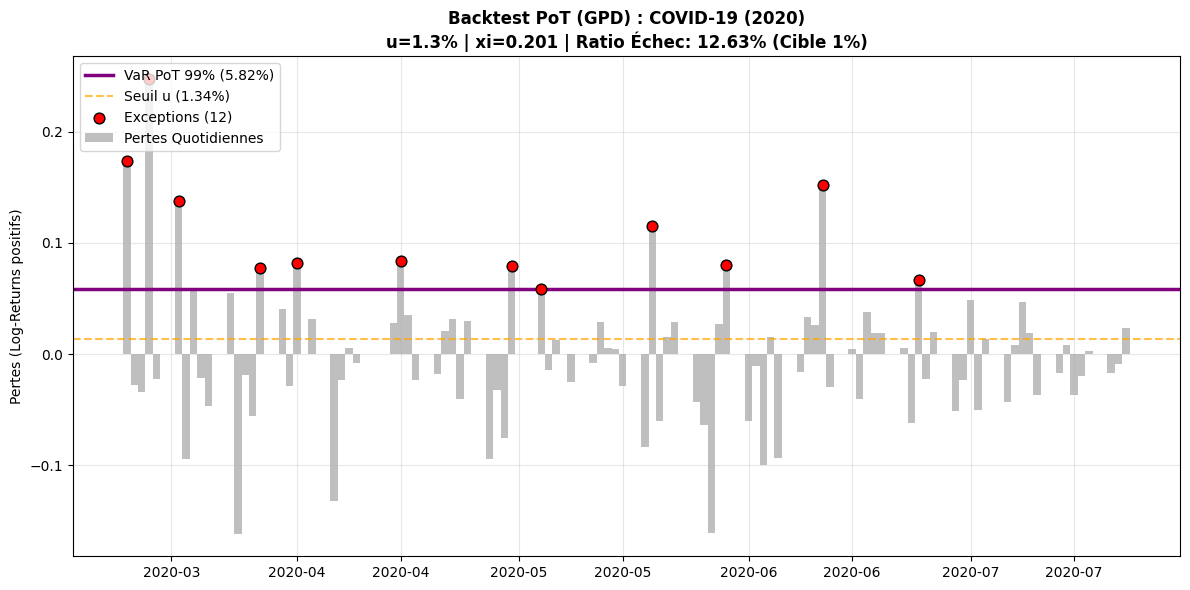

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.dates as mdates

# --- 1. FONCTION DE CALIBRATION (Celle que tu as fournie, adaptée pour retourner les valeurs) ---
def calibrate_pot_params(losses_train, scenario_name):
    """
    Trouve le seuil u optimal par minimisation KS sur le Train
    et retourne les paramètres calibrés (u, xi, sigma).
    """
    print(f"\n>>> CALIBRATION PoT (Train) : {scenario_name}")

    # Plage de recherche : Quantile 80% à 96%
    u_candidates = np.linspace(losses_train.quantile(0.80), losses_train.quantile(0.96), 30)

    best_u = None
    min_ks = np.inf
    best_params = (None, None) # (xi, sigma)

    for u in u_candidates:
        excesses = losses_train[losses_train > u] - u
        if len(excesses) < 20: continue # Sécurité statistique

        try:
            # Fit GPD (loc=0 car excès)
            xi, loc, scale = stats.genpareto.fit(excesses, floc=0)

            # Test KS
            ks_stat, _ = stats.kstest(excesses, 'genpareto', args=(xi, 0, scale))

            if ks_stat < min_ks:
                min_ks = ks_stat
                best_u = u
                best_params = (xi, scale)
        except:
            pass

    xi_opt, sigma_opt = best_params

    # Stats pour la formule VaR
    Nu = len(losses_train[losses_train > best_u])
    N = len(losses_train)

    print(f"   Seuil Optimal u* : {best_u:.2%} (KS={min_ks:.4f})")
    print(f"   Paramètres GPD   : xi={xi_opt:.4f}, sigma={sigma_opt:.4f}")
    print(f"   Excès (Train)    : {Nu}/{N} ({(Nu/N):.2%})")

    return best_u, xi_opt, sigma_opt, N, Nu

# --- 2. FONCTION BACKTEST ET PLOT ---
def backtest_and_plot_pot(config, df_source):
    name = config['name']

    # A. PRÉPARATION DES DONNÉES (Pertes Positives)
    # Train
    mask_train = (df_source.index >= config['train_start']) & (df_source.index <= config['train_end'])
    losses_train = -df_source.loc[mask_train, 'Log_Returns'].dropna()

    # Test
    mask_test = (df_source.index >= config['test_start']) & (df_source.index <= config['test_end'])
    losses_test = -df_source.loc[mask_test, 'Log_Returns'].dropna()

    # B. CALIBRATION (Sur Train)
    u_star, xi, sigma, N, Nu = calibrate_pot_params(losses_train, name)

    # C. CALCUL VaR PoT (Formule Analytique)
    # VaR = u + (sigma/xi) * ( ( (N/Nu)*(1-alpha) )^(-xi) - 1 )
    alpha = 0.99
    term = (N / Nu) * (1 - alpha)
    var_pot = u_star + (sigma / xi) * ( (term ** (-xi)) - 1 )

    # D. BACKTEST (Sur Test)
    exceptions = losses_test[losses_test > var_pot]
    n_exceptions = len(exceptions)
    n_obs = len(losses_test)
    ratio = n_exceptions / n_obs

    print(f"   VaR PoT 99%      : {var_pot:.2%}")
    print(f"   Exceptions Test  : {n_exceptions}/{n_obs} ({ratio:.2%})")

    # E. PLOT FINAL
    plt.figure(figsize=(12, 6))

    # Barres des pertes
    plt.bar(losses_test.index, losses_test, color='gray', alpha=0.5, label='Pertes Quotidiennes', width=1.0)

    # Ligne VaR
    plt.axhline(var_pot, color='purple', linewidth=2.5, label=f'VaR PoT 99% ({var_pot:.2%})')

    # Ligne Seuil u (pour info visuelle)
    plt.axhline(u_star, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Seuil u ({u_star:.2%})')

    # Exceptions (Points Rouges)
    plt.scatter(exceptions.index, exceptions, color='red', s=60, zorder=5, edgecolors='black', label=f'Exceptions ({n_exceptions})')

    # Esthétique
    title_text = (f"Backtest PoT (GPD) : {name}\n"
                  f"u={u_star:.1%} | xi={xi:.3f} | Ratio Échec: {ratio:.2%} (Cible 1%)")
    plt.title(title_text, fontsize=12, fontweight='bold')
    plt.ylabel("Pertes (Log-Returns positifs)")
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.tight_layout()
    plt.show()

# --- 3. EXÉCUTION ---

configs = [
    {
        "name": "SUBPRIMES (2008)",
        "train_start": "2004-01-01", "train_end": "2008-10-07",
        "test_start": "2008-10-08", "test_end": "2009-06-01"
    },
    {
        "name": "COVID-19 (2020)",
        "train_start": "2016-01-01", "train_end": "2020-03-08",
        "test_start": "2020-03-09", "test_end": "2020-07-22"
    }
]

for conf in configs:
    backtest_and_plot_pot(conf, df_clean)